### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.1743

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective
To predict which customer is more likely to purchase the newly introduced travel package.


### Data Dictionary

#### Customer details:

**CustomerID:** Unique customer ID

**ProdTaken:** Whether the customer has purchased a package or not (0: No, 1: Yes)

**Age:** Age of customer

**TypeofContact:** How customer was contacted (Company Invited or Self Inquiry)

**CityTier:** City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3

**Occupation:** Occupation of customer

**Gender:** Gender of customer

**NumberOfPersonVisiting:** Total number of persons planning to take the trip with the customer

**PreferredPropertyStar:** Preferred hotel property rating by customer

**MaritalStatus:** Marital status of customer

**NumberOfTrips:** Average number of trips in a year by customer

**Passport:** The customer has a passport or not (0: No, 1: Yes)

**OwnCar:** Whether the customers own a car or not (0: No, 1: Yes)

**NumberOfChildrenVisiting:** Total number of children with age less than 5 planning to take the trip with the customer

**Designation:** Designation of the customer in the current organization

**MonthlyIncome:** Gross monthly income of the customer

#### Customer interaction data: 

**PitchSatisfactionScore:** Sales pitch satisfaction score

**ProductPitched:** Product pitched by the salesperson

**NumberOfFollowups:** Total number of follow-ups has been done by the salesperson after the sales pitch

**DurationOfPitch:** Duration of the pitch by a salesperson to the customer

## Load Libraries

In [1727]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
!pip install xgboost
from xgboost import XGBClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV, train_test_split

## Read the Dataset

In [1728]:
datafile = pd.ExcelFile('Tourism.xlsx')
datafile2 = pd.read_excel(datafile, 'Tourism')

In [1729]:
df = datafile2.copy()

## First & Last 5 rows

In [1730]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [1731]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


## Shape of Dataset

In [1732]:
df.shape

(4888, 20)

## Data types for columns

In [1733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations:**
- `ProdTaken`, `CityTier`, `Passport`, `PitchSatisfactionScore`, `OwnCar`, are numeric data types and need to be converted to categorical data types.
(NumberofPeopleVisitng, NumberofFollowups, NumberofChildrenVisiting?)
- `TypeofContact`, `Occupation`, `Gender`, `ProductPitched`, `PreferredPropertyStar`, `MaritalStatus`, `Designation` are object data types and need to be converted to categorical data types to reduce the data space needed to store the dataframe.

In [1734]:
cat_cols = ['ProdTaken', 'CityTier', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TypeofContact', 'Occupation','Gender',
            'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Designation']
df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

**Observations:**
- Memory usage has decreased by more than half from 763.9 KB to 364.5 KB

## Summary of Dataset

In [1735]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


**Observations:**
- It appears that there is data missing from columns: `Age`, `DurationOfPitch`, `NumberOfFollowups`, `NumbersofTrips`, `NumberofChildrenVisiting`, & `MonthlyIncome`. We will examine these closer.
- All of the means and medians for a column are fairly close together suggesting that the data is only slightly skewed in some columns.
- There is a bit of a gap between the 75th percentile and the max value for `DurationofPitch` & `Age` and a huge gap between the 75th percentile & max value for `NumberofTrips` & `MonthlyIncome` indicating that there may be outliers present.
- The `NumberofChildrenVisiting` seems to only have 4 different options of 0, 1, 2, & 3. We will examine this more closely when looking at the unique values of each column.
- The standard deviation for `MonthlyIncome` is quite high. `Age` and `DurationofPitch` also have a slightly higher standard deviation.

In [1736]:
df.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
PitchSatisfactionScore,4888,5,3,1478


**Observations:**
- It appears that there may be missing data from columns `TypeofContact`, & `PreferredPropertyStar`. We will examine this closer.
- Most customers seem to make self enquiries for `TypeofContact`.
- There are 4 different categories for `MaritalStatus` when you would think there would only be 2 (Married & Not Married). We will examine this closer.


## Examining Unique & Duplicate Columns

In [1737]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [1738]:
cols_cat = df.select_dtypes(['category'])
for i in cols_cat.columns:  
    print('Unique values in', i, 'are :')           
    print(cols_cat[i].value_counts())                                                            
    print('*' *50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
************

**Observations:**
- `CustomerID` does not add any value to our analysis as all values are unique. We will drop this column.
- `Gender` has a Female & Fe male option. This will be condensed into just Female.

In [1739]:
# will first make all letters in category lowercase
df.Gender = df.Gender.str.lower()
df.Gender.value_counts()

male       2916
female     1817
fe male     155
Name: Gender, dtype: int64

In [1740]:
# now will remove space between fe & male
df['Gender'] = df['Gender'].str.replace(" ","")
df['Gender'].value_counts()

male      2916
female    1972
Name: Gender, dtype: int64

In [1741]:
df[df.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [1742]:
dupes = df.duplicated()
sum(dupes)

0

**Observations:**
- There is no duplicated data

## Dropping Columns

In [1743]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [1744]:
df.shape
print('New shape of data: ' f' {df.shape[0]} rows & {df.shape[1]} columns')

New shape of data:  4888 rows & 19 columns


## Check for missing values & replacing them

In [1745]:
print(df.isnull().sum())
print('')
print('Any missing data?: ', df.isnull().values.any())

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Any missing data?:  True


**Observations:**
- `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberofTrips`, `NumberOfChildrenVisiting`, & `MonthlyIncome` all have missing values. These will be filled with the respective median for that column.

In [1746]:
# we will replace missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [1747]:
print(df.isnull().sum())
print('')
print('Any missing data?: ', df.isnull().values.any())

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

Any missing data?:  True


**Observations:**
- There are still missing values for `TypeofContact` & `PreferredPropertyStar`


In [1748]:
# filtering data & displaying data only with TypeofContact = NaN 

bool_contact = pd.isnull(df['TypeofContact']) 
df[bool_contact] 

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,0,31.0,NaN,1,13.0,Small Business,male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,22347.0
571,0,26.0,NaN,1,13.0,Salaried,female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,22347.0
572,0,29.0,NaN,1,13.0,Small Business,female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,22347.0
576,0,27.0,NaN,3,13.0,Small Business,male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,22347.0
579,0,34.0,NaN,1,13.0,Small Business,female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,22347.0
598,1,28.0,NaN,1,13.0,Small Business,male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,22347.0
622,0,32.0,NaN,3,13.0,Salaried,male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,22347.0
724,0,24.0,NaN,1,13.0,Small Business,female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,22347.0
843,0,26.0,NaN,1,13.0,Small Business,male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,22347.0
1021,1,25.0,NaN,3,13.0,Salaried,male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,22347.0


In [1749]:
# filtering data & displaying data only with PreferredPropertyStar = NaN 

bool_property = pd.isnull(df['PreferredPropertyStar']) 
df[bool_property] 

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,0,51.0,Self Enquiry,1,18.0,Salaried,female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,9.0,Small Business,male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,14.0,Salaried,female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,9.0,Small Business,female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,7.0,Small Business,male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,11.0,Large Business,female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,10.0,Salaried,male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,16.0,Salaried,male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


**Observations:**
- The missing values are NaN and will be replaced with the mode for each respective column.

In [1750]:
df = df.fillna(df.mode().iloc[0])

In [1751]:
print(df.isnull().sum())
print('')
print('Any missing data?: ', df.isnull().values.any())

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Any missing data?:  False


In [1752]:
df.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,0,32.0,Company Invited,1,8.0,Salaried,male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,0,30.0,Self Enquiry,1,30.0,Salaried,male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.0,Company Invited,1,29.0,Salaried,male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,0,36.0,Self Enquiry,1,33.0,Small Business,male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


## EDA

### Univariate

In [1753]:
def histogram_boxplot(feature, figsize=(12,8), bins = None):
    '''Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (10,6)
    bins: number of bins (default None/auto)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {'height_ratios': (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='pink') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette='pastel') if bins else sns.distplot(feature, kde=False, ax=ax_hist2, color='green')
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Observations on Age

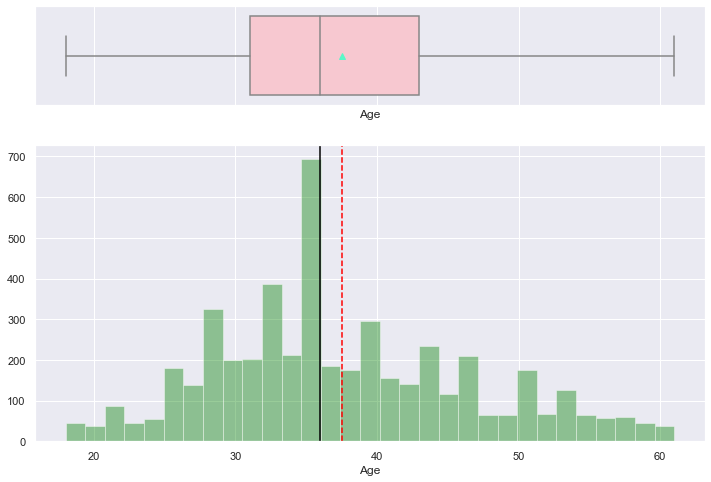

In [1398]:
histogram_boxplot(df['Age'])

* `Age` is slightly right skewed, but there does not appear to be many outliers.
* The median is around 36 years old and the average is around 37.

#### Observations on DurationOfPitch

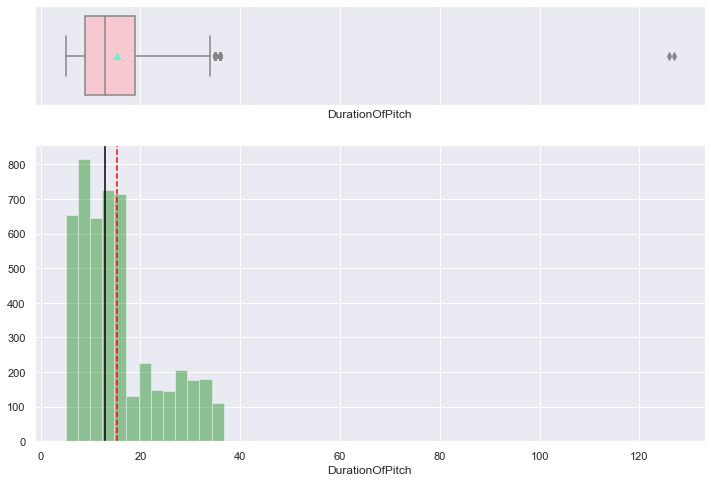

In [1399]:
histogram_boxplot(df['DurationOfPitch'])

* There are a couple of high value outliers, skewing the data to the right.
* Most of the pitches seem to fall between about 5 to 15 minutes.

#### Observations on NumberOfPersonVisiting

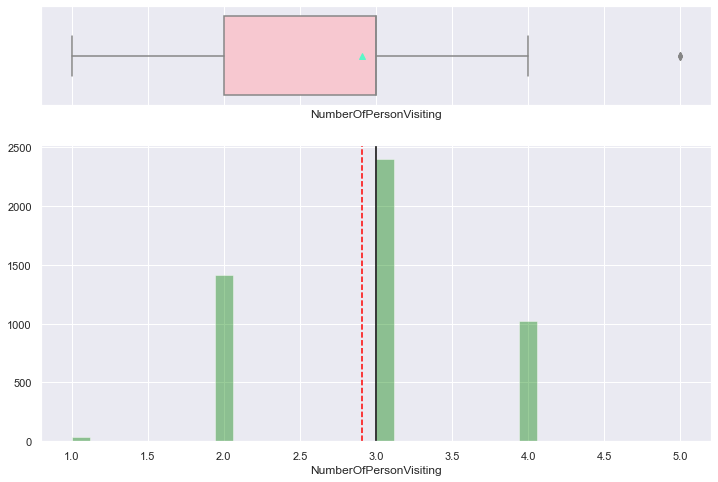

In [1400]:
histogram_boxplot(df['NumberOfPersonVisiting'])

* The median and mean are very close together with only about a 0.01 difference between the two.
* 3 people visiting is the most common number of people going on the trip.
* There are a few outliers at 1 person and 5 people.

#### Observations on NumberOfFollowups

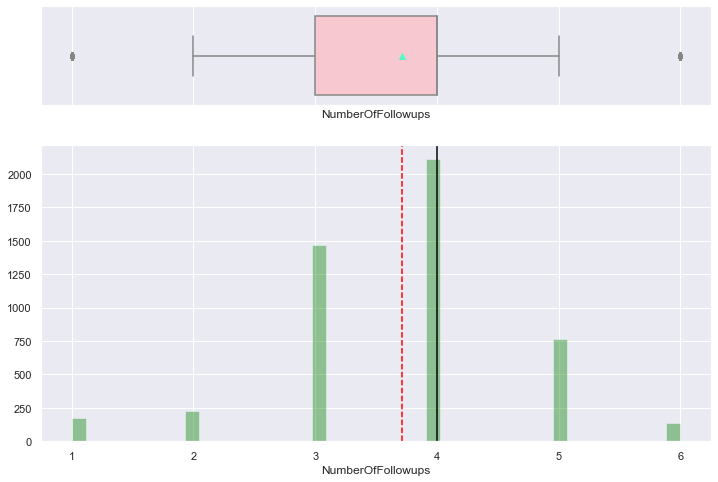

In [1401]:
histogram_boxplot(df['NumberOfFollowups'])

* The median number of followups is 4, with the data being slightly skewed to the left.

#### Observations on NumberOfTrips

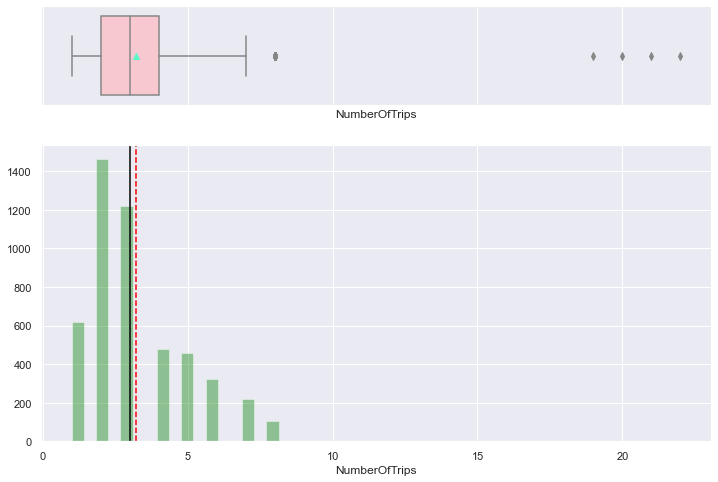

In [1402]:
histogram_boxplot(df['NumberOfTrips'])

* Almost all of the distribution of the data is between 1 to 5 trips.
* There are a few high number of outliers skewing the data ever so slightly to the right.
* From the histogram, we can see that most people went on 2 or 3 trips a year. 

#### Observations on NumberOfChildrenVisiting

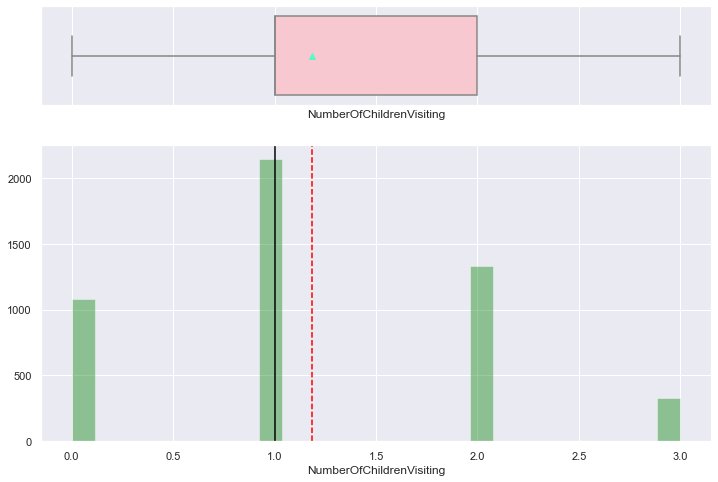

In [1403]:
histogram_boxplot(df['NumberOfChildrenVisiting'])

* The number of children younger than 5 visiting is from the range of 0 to 3, with no apparent outliers.
* a majority of the customers only plan on bringing a median & average of 1 child with them on a trip.

#### Observations on MonthlyIncome

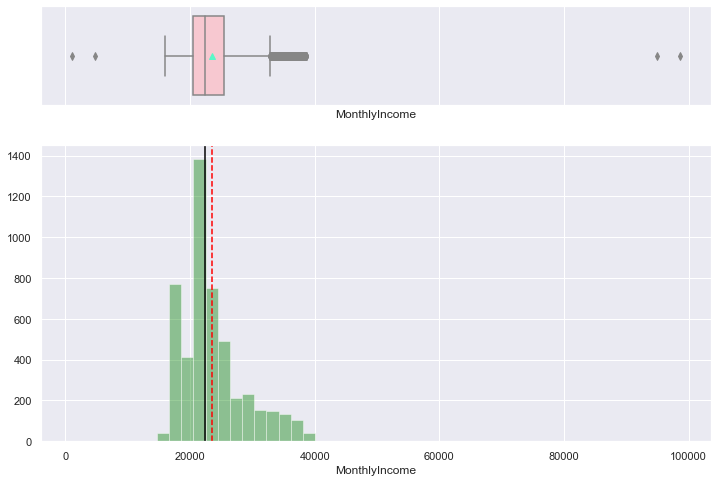

In [1404]:
histogram_boxplot(df['MonthlyIncome'])

* The distribution of the `MonthlyIncome` is slightly skewed to the right. 
* From the boxplot, we can see that there are outliers on both sides, with a majority of them falling greater than the top 75% of customers.
* Most of the customers gross somewhere between 22k-24k dollars monthly.

In [1405]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.15 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

#### Observations on ProdTaken

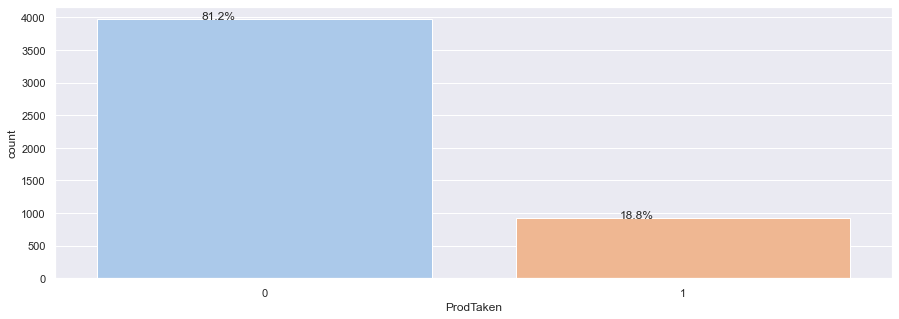

In [1406]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['ProdTaken'],palette='pastel')
perc_on_bar(ax,df['ProdTaken'])

* A majority (81.2%) of customers did not purchase a package.

#### Observations on TypeofContact

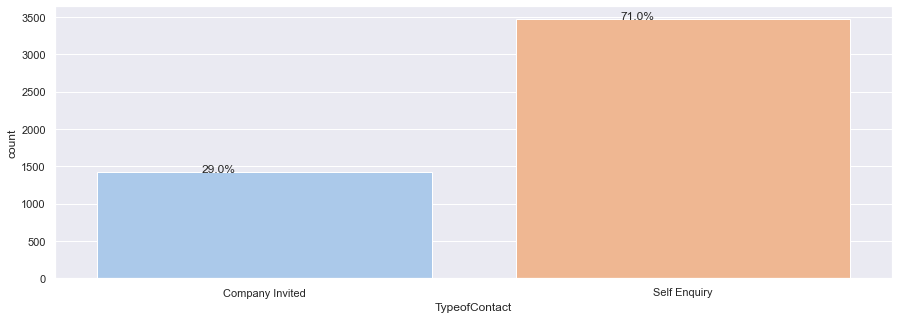

In [1407]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['TypeofContact'],palette='pastel')
perc_on_bar(ax,df['TypeofContact'])

* 71% of customers inquired about a vacation package on their own, while 29% were company invited.

#### Observations on CityTier

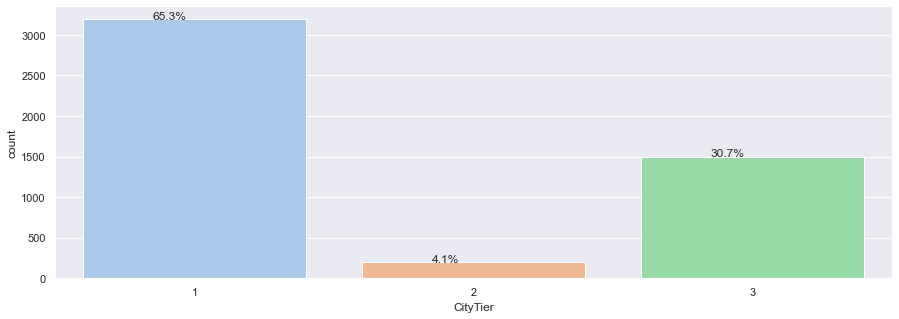

In [1408]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['CityTier'],palette='pastel')
perc_on_bar(ax,df['CityTier'])

* A majority of the customers fall in Tier 1 (65.3%), the highest ranking of the 3 tiers.
* Tier 2 has the lowest amount of customers at 4.1%.

#### Observations on Occupation

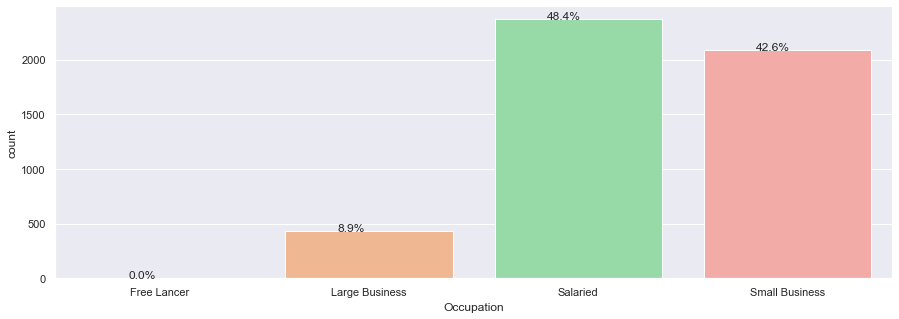

In [1409]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Occupation'],palette='pastel')
perc_on_bar(ax,df['Occupation'])

* Almost all customers are either Salaried (48.4%) or have a Small Business (42.6%).
* Freelancers only take up about 0.01% of the customers.

#### Observations on Gender

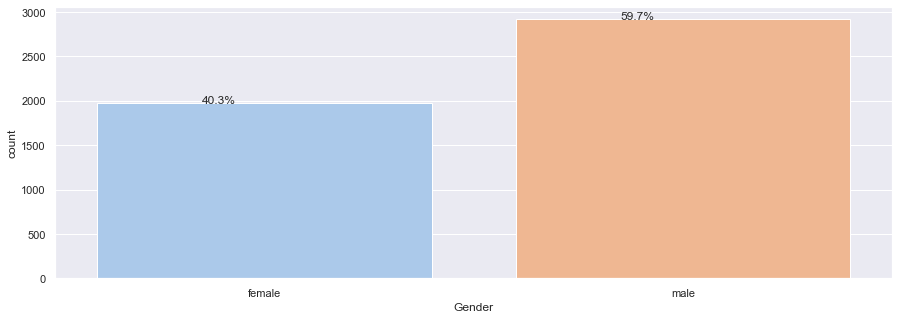

In [1410]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Gender'],palette='pastel')
perc_on_bar(ax,df['Gender'])

* A majority of the customers are male at 59.7%

#### Observations on ProductPitched

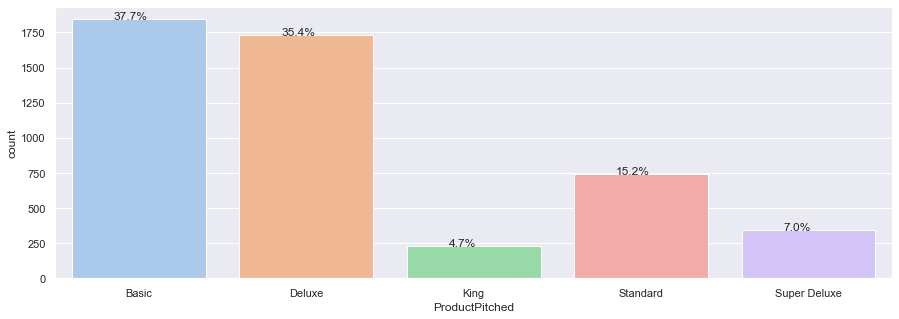

In [1411]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['ProductPitched'],palette='pastel')
perc_on_bar(ax,df['ProductPitched'])

* The Basic & Deluxe are the most pitched products by a salesperson.
* The least pitched product is the King.

#### Observations on PreferredPropertyStar

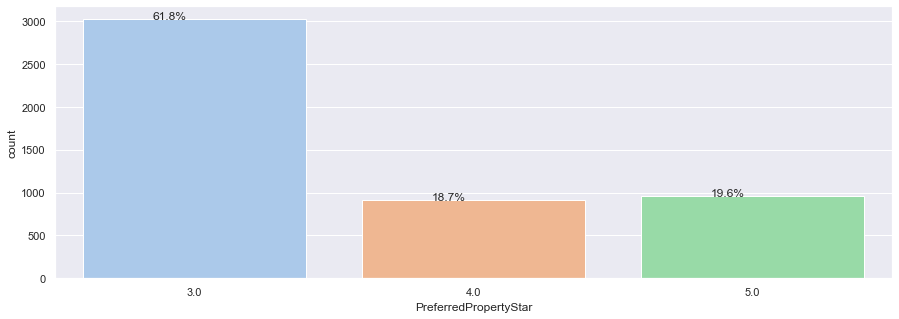

In [1412]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['PreferredPropertyStar'],palette='pastel')
perc_on_bar(ax,df['PreferredPropertyStar'])

* A majority of the customers prefer at least a 3 star hotel property, with 61.8% preferring a 3 star rating.

#### Observations on MaritalStatus

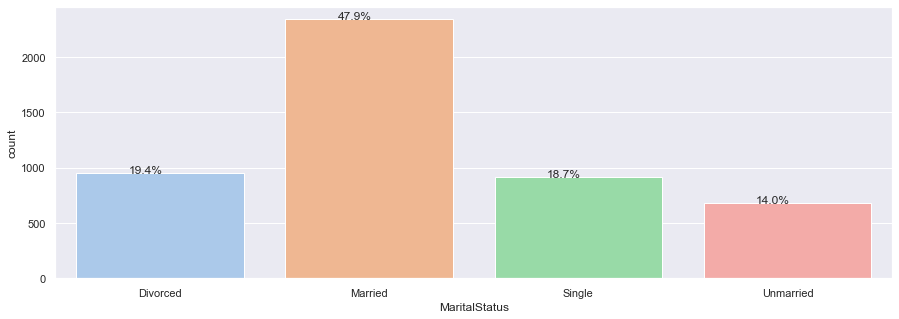

In [1413]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['MaritalStatus'],palette='pastel')
perc_on_bar(ax,df['MaritalStatus'])


* Most customer are married (47.9%).
* 19.4% & 18.7% sre divorced or signle, respectively.

#### Observations on Passport

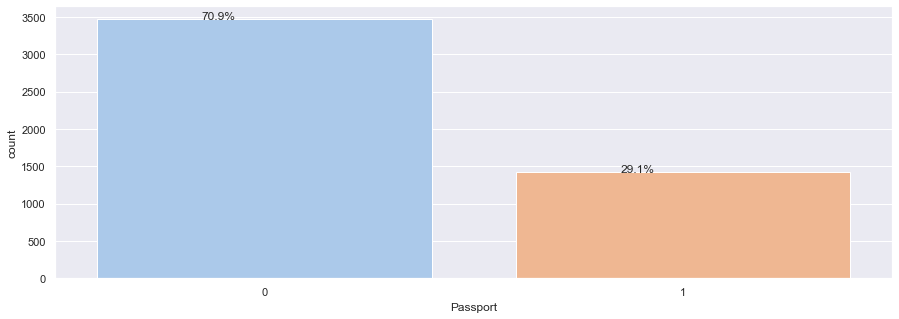

In [1414]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Passport'],palette='pastel')
perc_on_bar(ax,df['Passport'])


* 70.9% of customer do not have a passport.

#### Observations on PitchSatisfactionScore

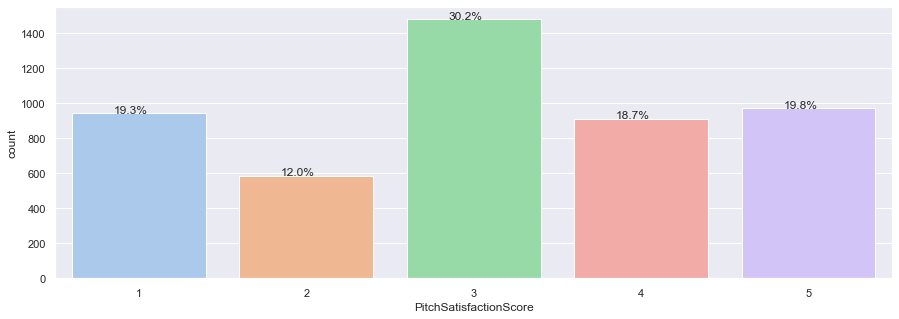

In [1415]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['PitchSatisfactionScore'],palette='pastel')
perc_on_bar(ax,df['PitchSatisfactionScore'])


* 30.2% of customers would rate their Pitch Satisfaction as only a 3 out of 5.
* a score of 2 out of 5 has the least amount of ratings from the customers.

#### Observations on OwnCar

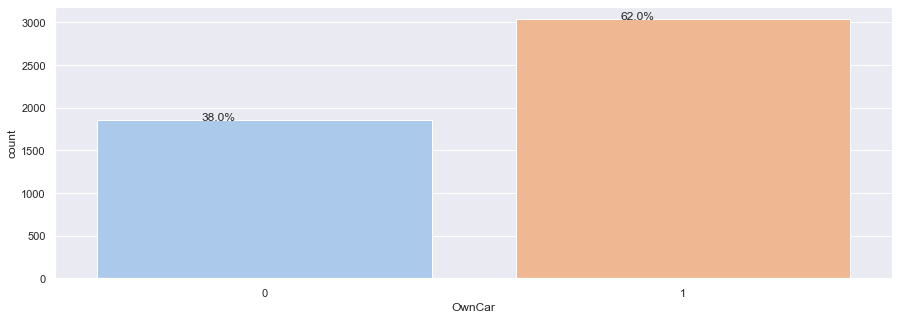

In [1416]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['OwnCar'],palette='pastel')
perc_on_bar(ax,df['OwnCar'])

* A bulk of the customers own their own car (62%)

#### Observations on Designation

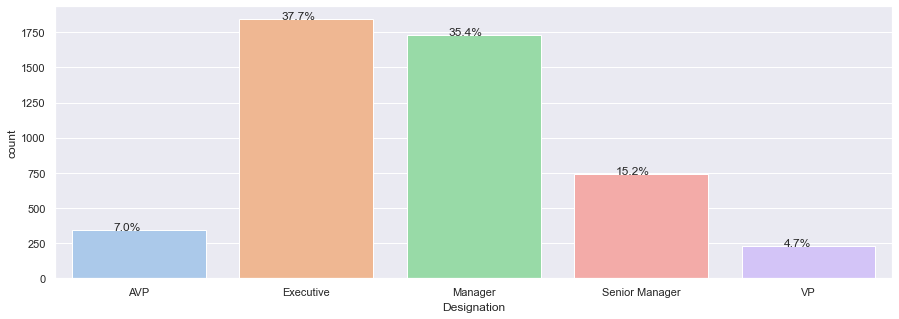

In [1417]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Designation'],palette='pastel')
perc_on_bar(ax,df['Designation'])

* The greater part of customers hold either an Executive position (37.7%) or a Manager Designation position (35.4%)
* VP has the lowest number of customers at 4.7%

### Bivariate/Multi-variate

In [1887]:
df.corr()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
Age,1.000000,-0.006261,0.017856,0.001682,0.174694,0.008486,0.461282
DurationOfPitch,-0.006261,1.000000,0.073163,0.015515,0.014153,0.038115,0.003345
NumberOfPersonVisiting,0.017856,0.073163,1.000000,0.324895,0.190113,0.606321,0.198449
NumberOfFollowups,0.001682,0.015515,0.324895,1.000000,0.135103,0.281583,0.175921
NumberOfTrips,0.174694,0.014153,0.190113,0.135103,1.000000,0.161022,0.115210
NumberOfChildrenVisiting,0.008486,0.038115,0.606321,0.281583,0.161022,1.000000,0.189684
MonthlyIncome,0.461282,0.003345,0.198449,0.175921,0.115210,0.189684,1.000000


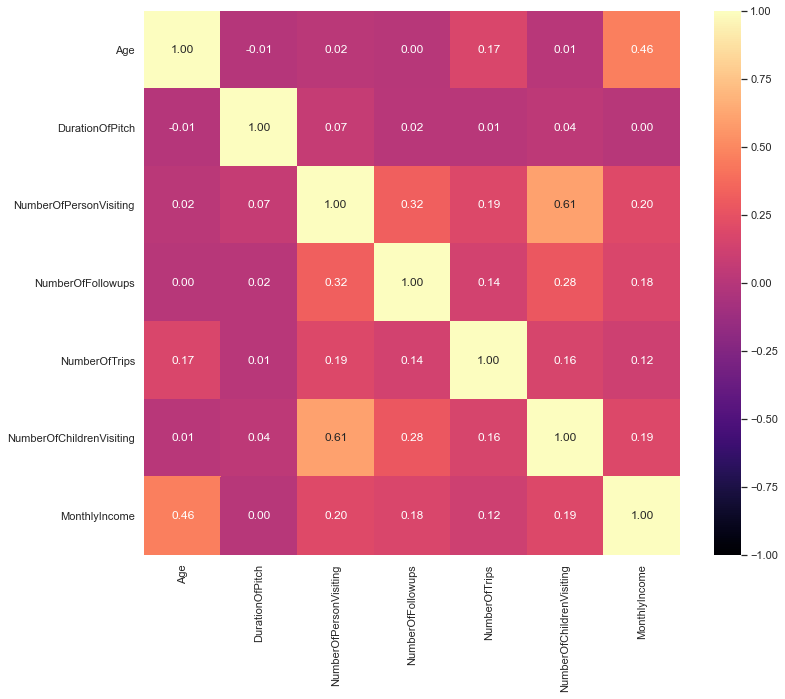

In [1419]:
# heat map
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f', cmap = 'magma')
plt.show()


**Observations:**
- `DurationOfPitch` & `MonthlyIncome` are not correlated at all.
- `NumberofFollowups` & `Age` not correlated either.
- Unsurprisingly, one of the highest correlated variables are `MonthlyIncome` & `Age` at 0.46, which is only seconf to `NumberOfPersonVisiting` & `NumberofChildrenVisiting` at 0.61.
- `Age` is not correlated to `DurationOfPitch`,  `NumberofPersonVisiting`, & `NumberOfChildrenVisiting` with a score of -.01, .02, & .01 respectively.
- `DurationOfPitch` does not have any correlation to the other numerical variables with all the scores being between -.01 to .07.
-

#### ProdTaken vs Age & MonthlyIncome

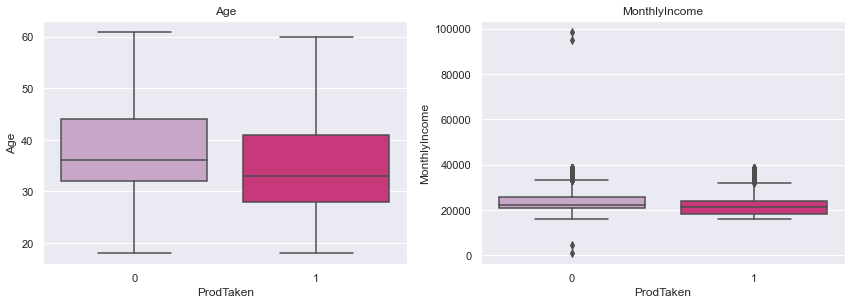

In [1420]:
cols = df[['Age','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,12))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df['ProdTaken'],df[variable],palette='PuRd')
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**
- The median for a customer buying a package is a younger age than the median for not buying a package
-  Monthly income does not seem to make a big impact for if a customer will buy a package or not; both medians are about the same 

#### ProdTaken vs DurationOfPitch & NumberOfFollowups

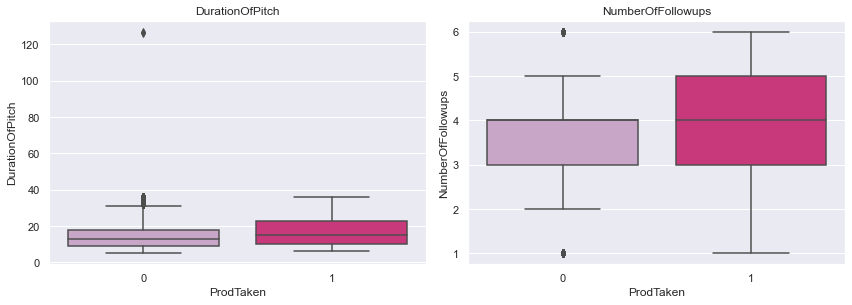

In [1421]:
cols = df[['DurationOfPitch','NumberOfFollowups']].columns.tolist()
plt.figure(figsize=(12,12))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df['ProdTaken'],df[variable],palette='PuRd')
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**
- The medians for the DurationOfPitch for if a customer buys a package or not is pretty similar, although the extreme outliers for time do not buy a package.
- For NumberOfFollowups, it seems that a customer will go either way, regardless of the number of follow ups. The median for if a customer does buy a package is 4 follow ups.

ProdTaken           0    1   All
DurationOfPitch                 
5.0                 6    0     6
6.0               268   39   307
7.0               294   48   342
8.0               273   60   333
9.0               404   79   483
10.0              199   45   244
11.0              168   37   205
12.0              162   33   195
13.0              397   77   474
14.0              212   41   253
15.0              217   52   269
16.0              218   56   274
17.0              148   24   172
18.0               56   19    75
19.0               36   21    57
20.0               46   19    65
21.0               57   16    73
22.0               66   23    89
23.0               58   21    79
24.0               54   16    70
25.0               59   14    73
26.0               60   12    72
27.0               58   14    72
28.0               44   17    61
29.0               53   21    74
30.0               65   30    95
31.0               52   31    83
32.0               59   15    74
33.0      

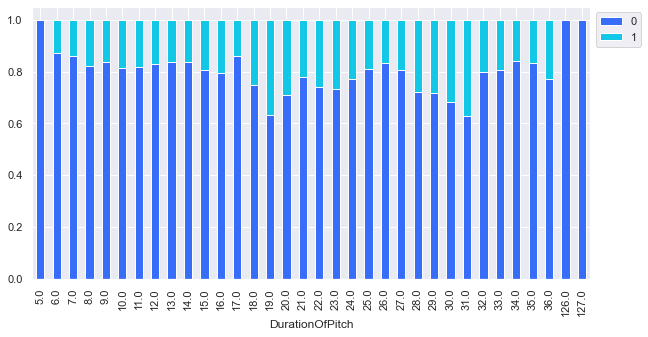

In [1898]:
# DurationOfPitch vs ProdTaken
stacked_plot(df['DurationOfPitch'])

**Observations:**
- The ideal duration of a pitch for a customer to buy a package is between 18-31 minutes.
- 100% of customers that said no to purchase a vacation package when the duration of pitch is 5 minutes or more than 125 minutes.

#### ProdTaken vs NumberOfPersonVisiting, NumberofChildrenVisiting, & NumberOfTrips

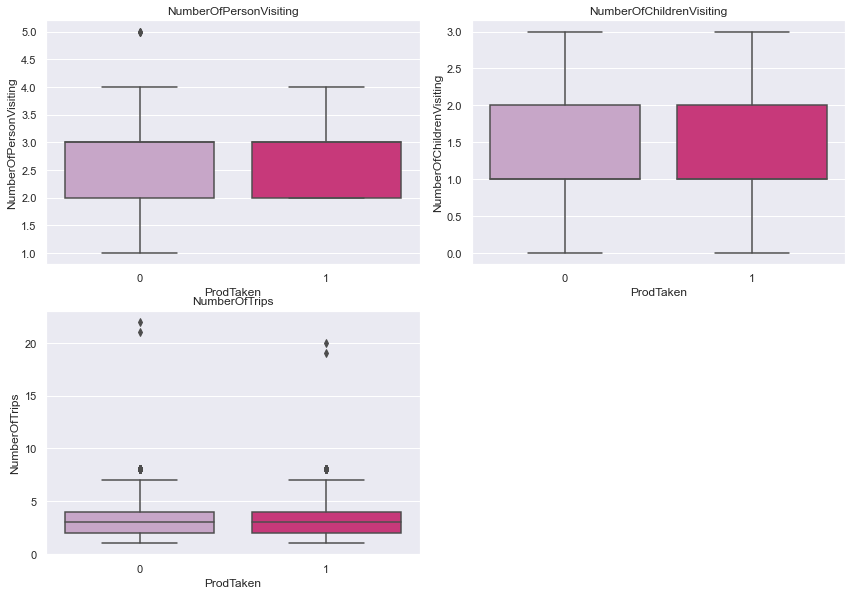

In [1422]:
cols = df[['NumberOfPersonVisiting','NumberOfChildrenVisiting', 'NumberOfTrips']].columns.tolist()
plt.figure(figsize=(12,12))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df['ProdTaken'],df[variable],palette='PuRd')
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**
- The minimum NumberOfPersonVisiting that are going to buy a product is 2 people. Customers are more likely to not buy a product when there are more people going on the trip. 
- There is really no distinguishable difference between the NumberOfChildrenVisiting & if a customer will buy a vacation package or not.
- The NumberOfTrips does not play a significant role in if a customer will buy a package or not, with both options containing outliers.

#### ProdTaken vs TypeofContact

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


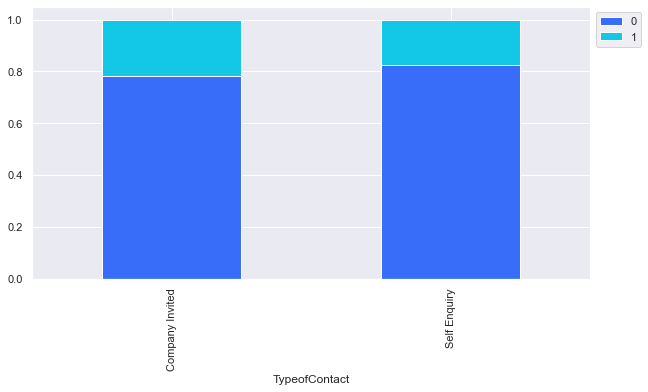

In [1424]:
stacked_plot(df['TypeofContact'])

**Observations:**
- 17.6% of customers who self inquired ended up purchases a package, where as 21.8% of customers who were company invited bought a vacation package.

#### ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


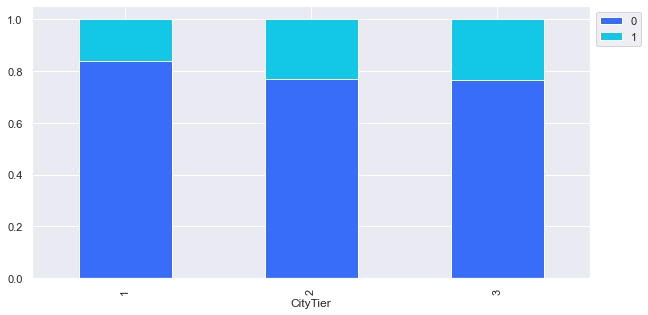

In [1425]:
stacked_plot(df['CityTier'])

**Observations:**
- Although Tier 1 has the highest rating in development of a city, population, facilities, and living standards, it has the lowest percent of vacation products purchased at 16.3%.
- Tier 2 has a product purchase rate of 23.23% and Tier 3 of 18.8%.

#### ProdTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


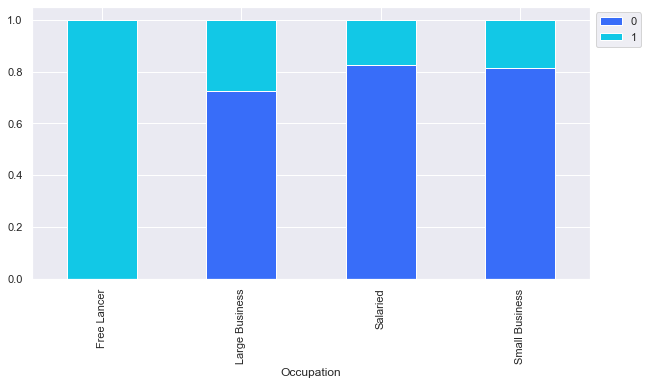

In [1426]:
stacked_plot(df['Occupation'])

**Observations:**
- Although with only 2 customers being Free Lancers, both bought a vacation package. This could be possible due to a more flexible work schedule.
- Large Business occupation customers have the second largest percent of purchased products at 27.65%.
- Salaried & Small Business have similar rates of 17.48% & 18.43%, respectively, of purchased vacation packages.

#### ProdTaken vs Gender

ProdTaken     0    1   All
Gender                    
female     1630  342  1972
male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


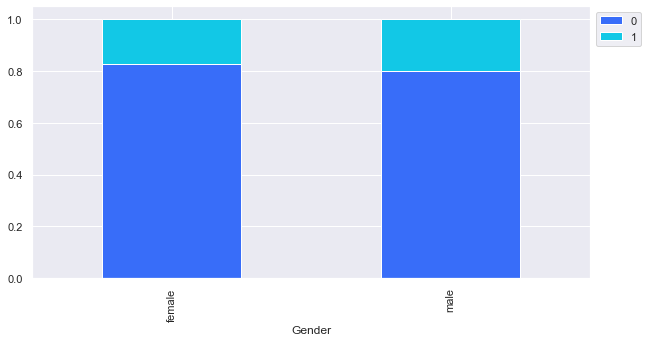

In [1427]:
stacked_plot(df['Gender'])

**Observations:**
- Males are 19.82% likely to purchase a product, whereas women are at 17.34%.

#### ProdTaken vs ProductPitched

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


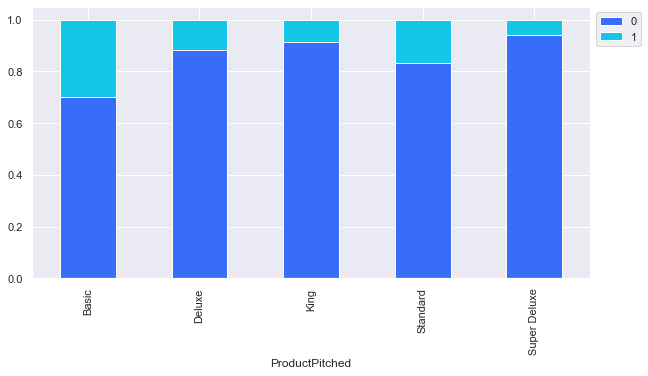

In [1428]:
stacked_plot(df['ProductPitched'])

**Observations:**
- The Super Deluxe package is the least purchased package at 5.85%.
- Unsurprisingly, the Basic product is the most purchased at 29.97%.
- As the product description becomes a higher quality, & most likely more expensive, the rate of purchase goes down, except for the last two (Super Deluxe is purchased less than the King package). 
- Standard Deluxe (5.85%) < King (8.7%) < Deluxe (11.8%) < Standard (16.7%) < Basic (29.97%). 

#### ProdTaken vs PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


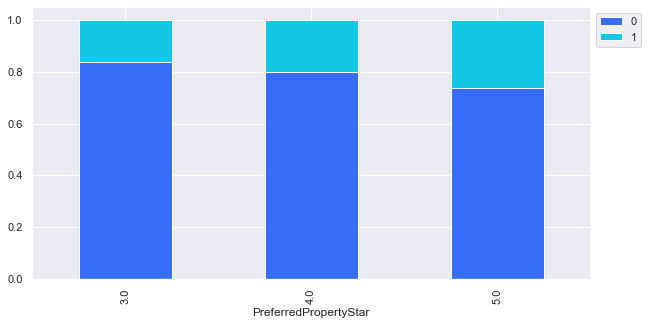

In [1429]:
stacked_plot(df['PreferredPropertyStar'])

**Observations:**
- As expected, customers that purchased a vacation package prefer a higher rated hotel.
- 3 stars (16.16%) < 4 stars (19.9%) < 5 starts (26.15%)

#### ProdTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


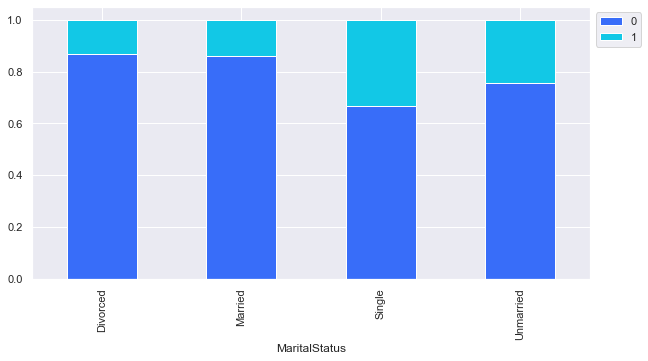

In [1430]:
stacked_plot(df['MaritalStatus'])

**Observations:**
- It appears that unmarried & single customers are more likely to purchase a package at 24.3% & 33.2% respectively.

#### ProdTaken vs Passport

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


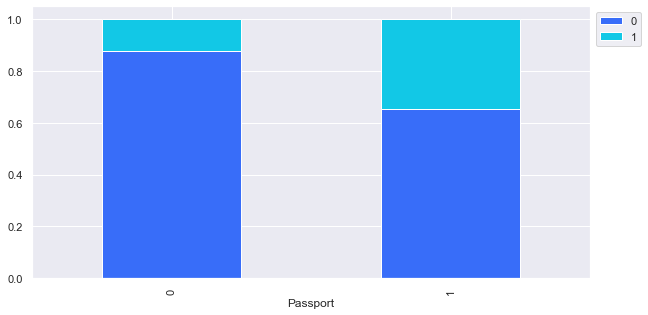

In [1431]:
stacked_plot(df['Passport'])

**Observations:**
- As expected, those with passports are more likely to purchase a product (34.7%) than those without a passport (12.3%)

#### ProdTaken vs PitchSatisfactionScore

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


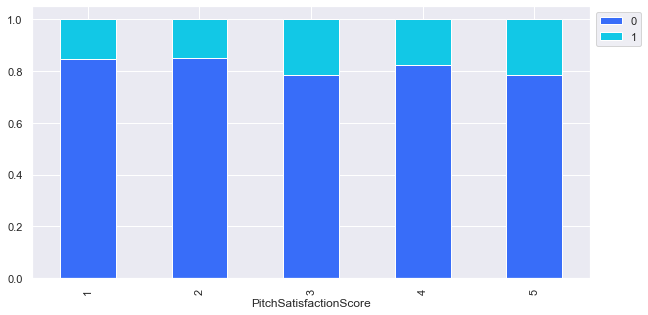

In [1432]:
stacked_plot(df['PitchSatisfactionScore'])

**Observations:**
- Although one would believe that the PitchSatisfactionScore would be a determining factor in the purchase of a vacation package, it appears not to be the case.
- 2 (15%) < 1 (15.3) < 4 (17.8%) < 3 (21.4%) < (21.7)
- We will look further into this to see if potentially the TypeofContact plays a role (i.e. if a customer is inquiring on their own, they are more likely to purchase a package regardless of the PitchSatisfactionScore)

#### ProdTaken vs OwnCar

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


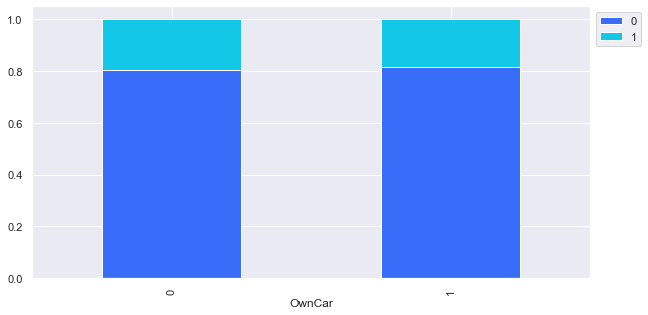

In [1433]:
stacked_plot(df['OwnCar'])

**Observations:**
- Whether or not a customer owns a car does not seem to be a contributing factor to if a product is purchased or not with no car at 18.5% purchased a product & those having a car at 19.4% purchased a product.

#### ProdTaken vs Designation

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


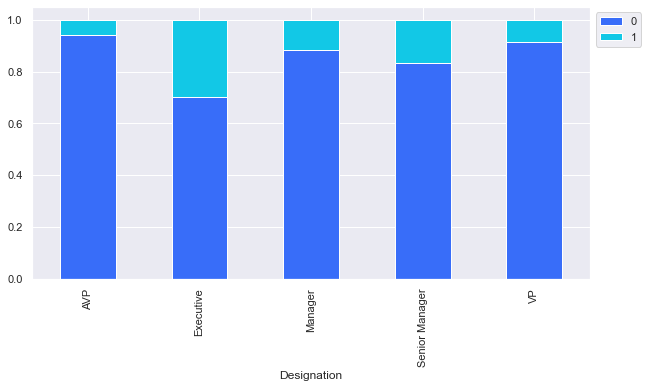

In [1434]:
stacked_plot(df['Designation'])

**Observations:**
- 5.8, 30, 11.8, 16.7, 8.7
- Customers in an Executive position purchase a vacation package the most at 30%.
- AVP & VP positions purchase the least amount of vacation packages at 5.8% & 8.7%, respectively.

#### MonthlyIncome vs Age vs ProdTaken

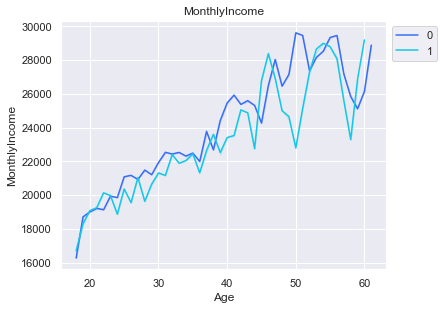

In [1902]:
cols = df[['MonthlyIncome']].columns.tolist()
plt.figure(figsize=(15,12))
for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.lineplot(df['Age'],df[variable],hue=df['ProdTaken'],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
                     plt.legend(bbox_to_anchor=(1, 1))
plt.show()

**Observation:**
- Typically, customers of the same age, with a lower monthly income are more likely to purchase a vacation package.

#### Occupation vs Monthly Income vs Designation

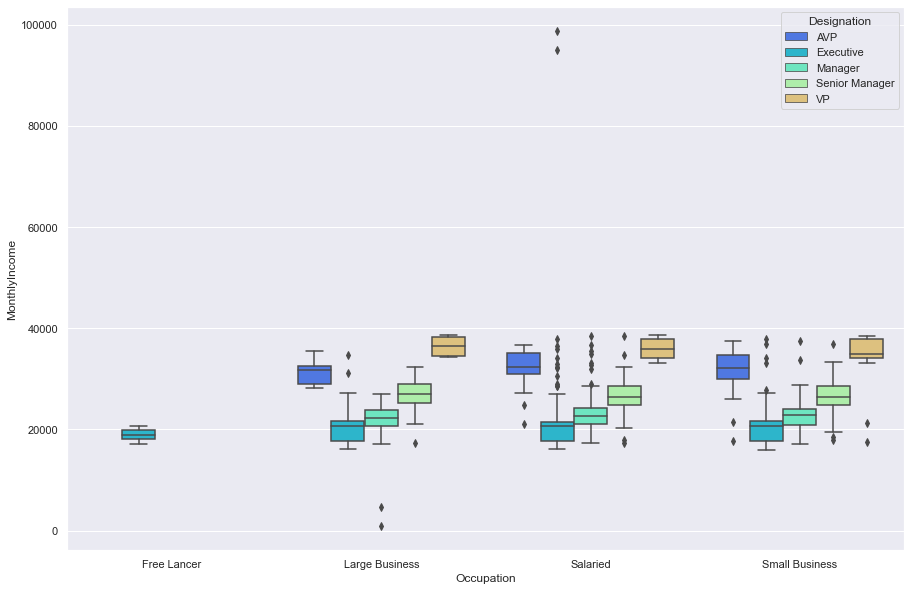

In [1435]:
plt.figure(figsize=(15,10))
sns.boxplot(df['Occupation'],df['MonthlyIncome'],hue=df['Designation'])
plt.show()

**Observations:**
- The group with the largest outliers is for Salaried Executives making between 90k-100k monthly.
- There is a pattern that can be seen when looking at the MonthlyIncome of Occupations of Large Business, Salaried, & Small Business. Without regards to the outliers, the amount of monthly income follows a patern of Executive < Manager < Senior Manager < AVP < VP. The medians follow this same pattern.

#### PreferredPropertyStar vs Monthly Income

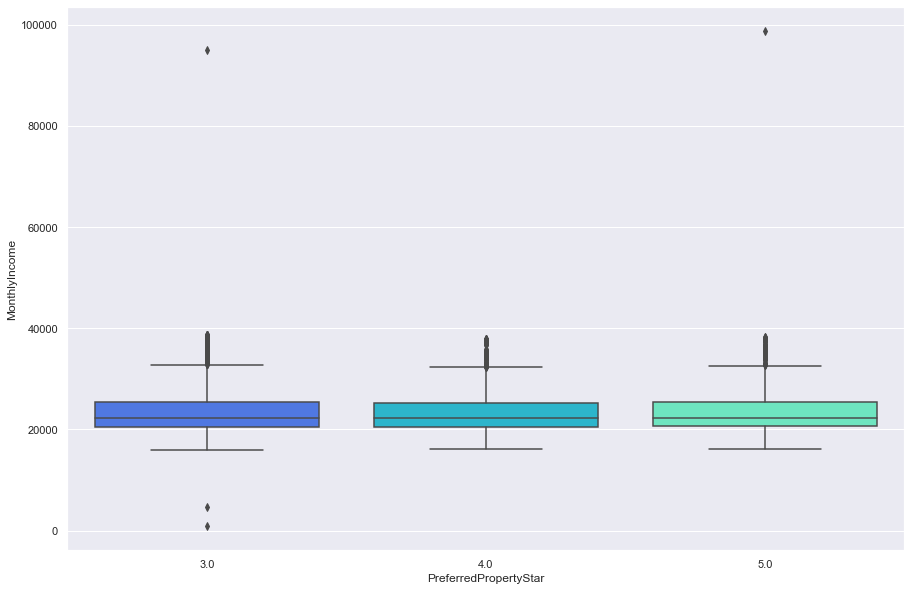

In [1436]:
plt.figure(figsize=(15,10))
sns.boxplot(df['PreferredPropertyStar'],df['MonthlyIncome'])
plt.show()

**Observations:**
- The median is about the same for all 3 PreferredPropertyStar
- The outlier for MonthlyIncome of almost 100k prefers a 5 star hotel, while the outliers of customers making less than 10k prefer 3 star hotels.

#### NumberOfTrips vs MonthlyIncome

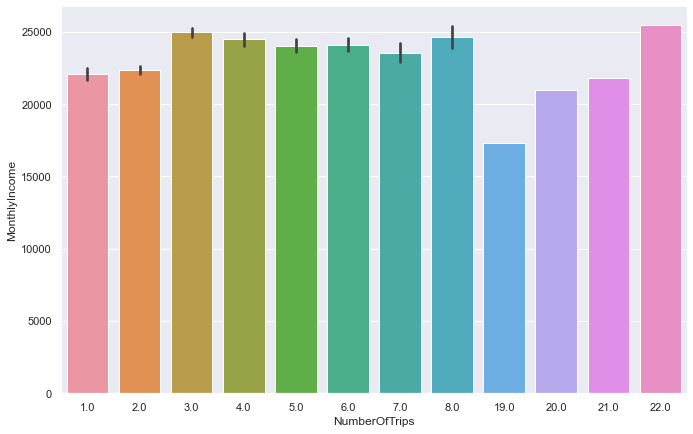

In [1437]:
sns.catplot(x='NumberOfTrips', y='MonthlyIncome', data=df, kind='bar', height=6, aspect=1.6, estimator=np.mean);

**Observations:**
- Customers who make the greatest income take more trips.

#### PitchSatisfactionScore vs DurationOfPitch vs NumberOfFollowups

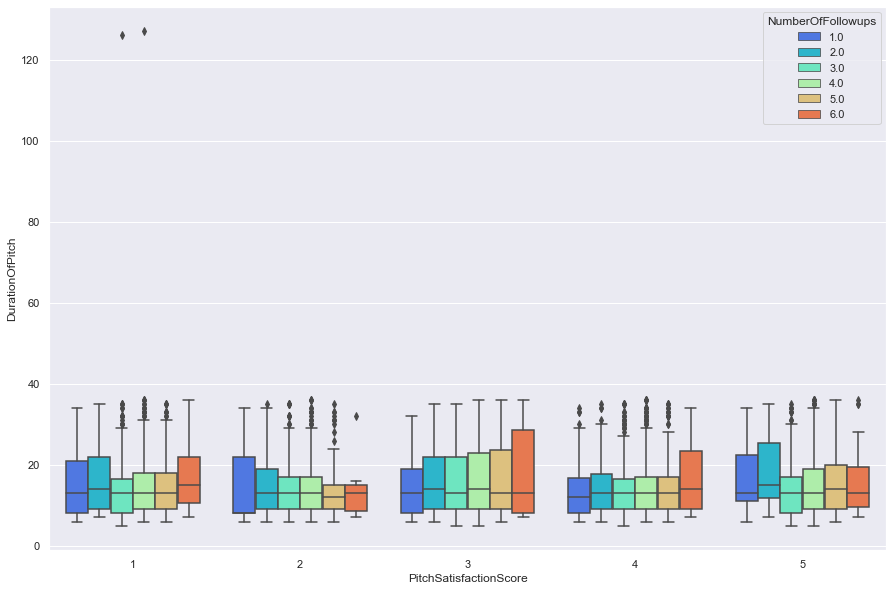

In [1438]:
plt.figure(figsize=(15,10))
sns.boxplot(df['PitchSatisfactionScore'],df['DurationOfPitch'],hue=df['NumberOfFollowups'])
plt.show()

**Observations:**
- Both customers that had DurationOfPitch over 120 minutes rated their PitchSatisfactionScore as 1.
- The greatest 75% quartile is for a PitchSatisfactionScore of 3 and DurationOfPitch of 6.

#### PitchSatisfactionScore vs TypeOfContact 

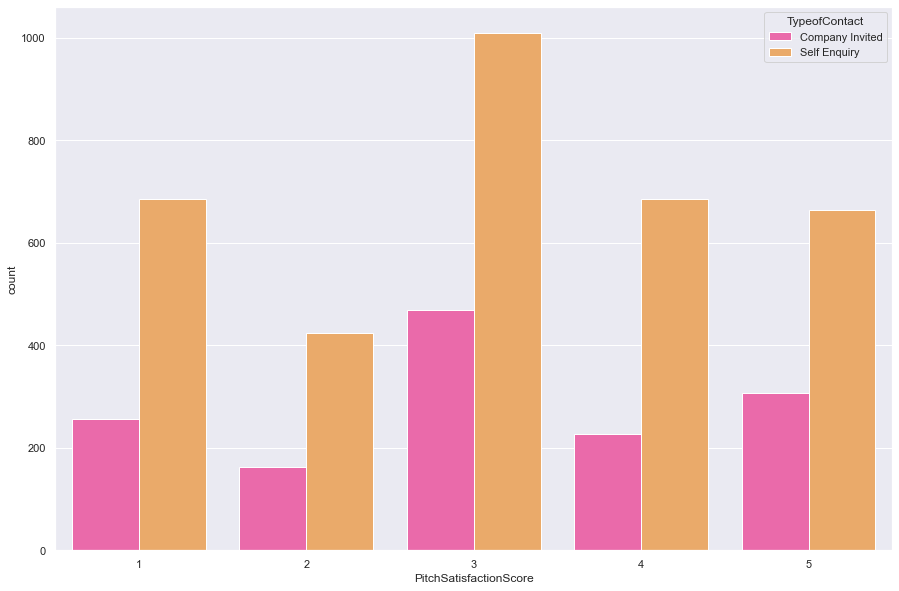

In [1439]:
plt.figure(figsize=(15,10))
sns.countplot(df['PitchSatisfactionScore'], hue=df['TypeofContact'], palette='spring')
plt.show()

**Observations:**
- From our comparison early of ProdTaken and PitchSatisfactionScore, we determined the PitchSatisfactionScore is not crucial to whether a customer buys a package or not. We see here that whether the customer reached out themselves to inquire about a vacation package does not contribute to their PitchSatisfactionScore as the score that had the most self inquries is for 3.

#### OwnCar vs NumberOfTrips vs Passport

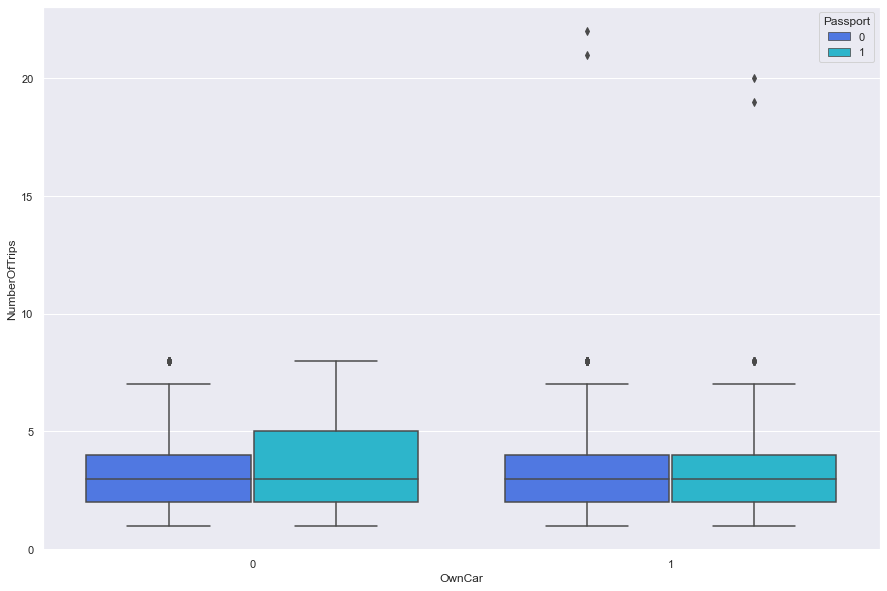

In [1440]:
plt.figure(figsize=(15,10))
sns.boxplot(df['OwnCar'],df['NumberOfTrips'],hue=df['Passport'])
plt.show()

**Observations:**
- Customers, with & without passports, who own a car have more outliers for the number of trips that they go on.
- The median looks to be the same for all of the boxplots.

#### NumberOfTrips vs NumberOfChildrenVisiting

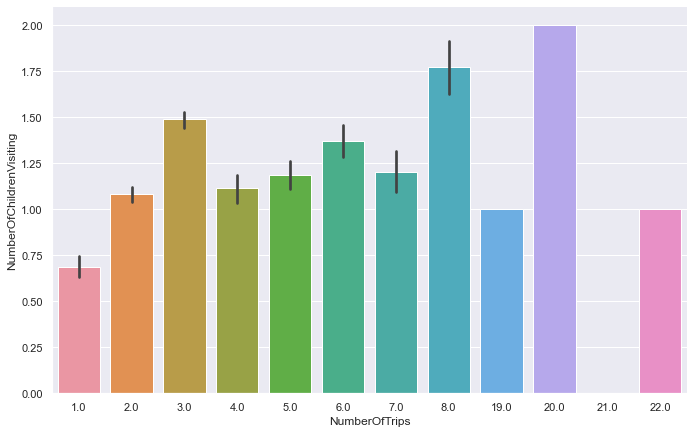

In [1441]:
sns.catplot(x='NumberOfTrips', y='NumberOfChildrenVisiting', data=df, kind='bar', height=6, aspect=1.6, estimator=np.mean);

**Observations:**
- There does not appear to be a pattern between the NumberOfChildrenVisiting & the NumberOfTrips that a customer goes on.

#### PreferredPropertyStar vs CityTier

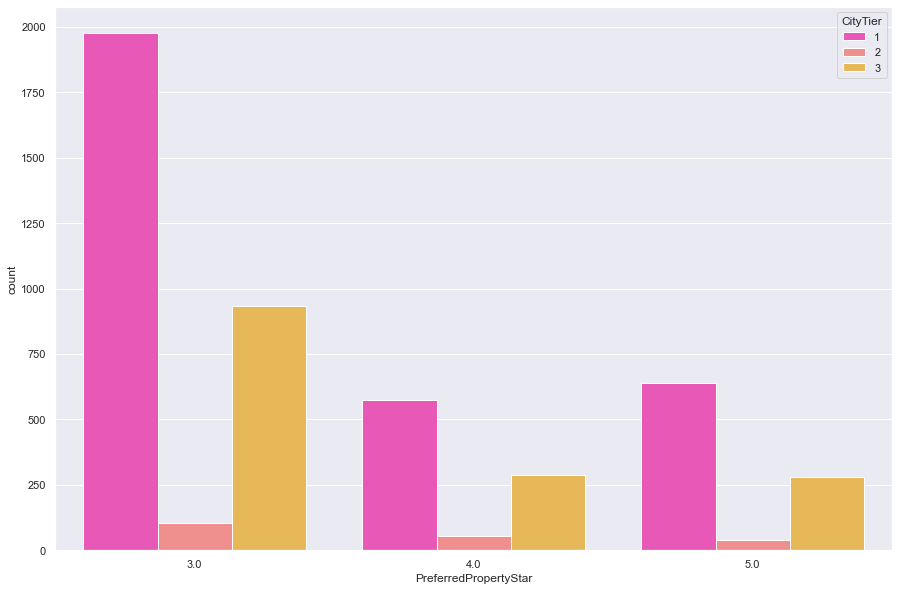

In [1442]:
plt.figure(figsize=(15,10))
sns.countplot(df['PreferredPropertyStar'], hue=df['CityTier'], palette='spring')
plt.show()

**Observations:**
- Unexpectedly, customers that live in a tier 1 city prefer a 3.0 star hotel.

#### MaritalStatus vs NumberOfPersonVisiting

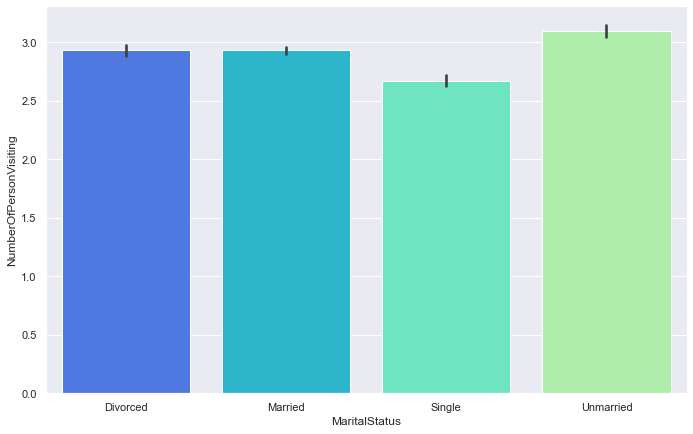

In [1443]:
sns.catplot(x='MaritalStatus', y='NumberOfPersonVisiting', data=df, kind='bar', height=6, aspect=1.6, estimator=np.mean);

**Observations:**
- It does not appear that MaritalStatus affects the NumberOfPeopleVisiting.

#### MaritalStatus vs NumberOfChildrenVisiting

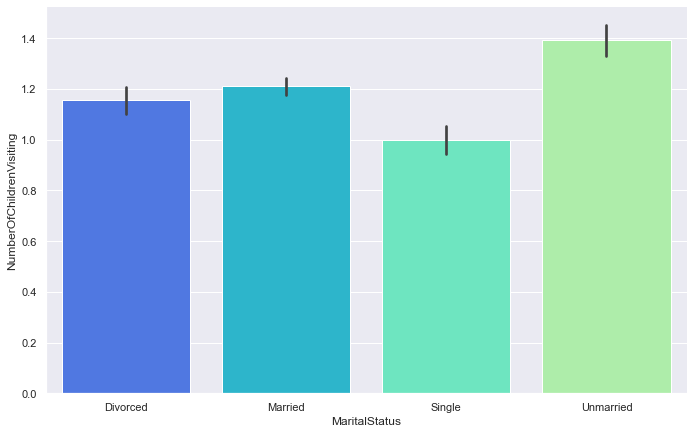

In [1444]:
sns.catplot(x='MaritalStatus', y='NumberOfChildrenVisiting', data=df, kind='bar', height=6, aspect=1.6, estimator=np.mean);

**Observations:**
- Unmarried customers have, on average, more children visiting on a trip than the other categories.
- Unsurprisingly, customers that are single have the least amount of children less than 5 years old that they plan on taking on a trip.

## Outliers
### Percentage of outliers, in each column of the data, using IQR

In [1446]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [1447]:
((df.select_dtypes(include=['float64','int64'])<lower) | (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df)*100

Age                         0.000000
DurationOfPitch             2.291326
NumberOfPersonVisiting      0.061375
NumberOfFollowups           6.382979
NumberOfTrips               2.229951
NumberOfChildrenVisiting    0.000000
MonthlyIncome               7.671849
dtype: float64

**Observations:**
- After identifying outliers, we can decide whether or not to remove/treat them. Here we will treat `DurationOfPitch`, but not `NumberOfTrips`, `NumberofFollowups`, & `MonthlyIncome`. We want our model to learn underlying patterns for real case scenarios for such customers, such as the `NumberOfTrips` or `MonthlyIncome`.
- Althouigh `NumberofFollowups` has a large outlier, we will leave it alone as this could play an important role into 

### Outlier Treatment - DurationOfPitch

In [1448]:
Q_1 = np.percentile(df.DurationOfPitch, 25)
Q_3 = np.percentile(df.DurationOfPitch, 75)

IQR_duration = Q_3 - Q_1

Lower = Q_1 - (1.5*IQR_duration)
Upper = Q_3 + (1.5*IQR_duration)

df[df['DurationOfPitch'] > Upper]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
61,0,38.0,Company Invited,1,35.0,Salaried,female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,17406.0
141,0,36.0,Self Enquiry,1,35.0,Small Business,male,2,3.0,Basic,3.0,Single,6.0,0,2,1,0.0,Executive,18452.0
199,0,38.0,Self Enquiry,1,35.0,Large Business,male,2,3.0,Deluxe,3.0,Divorced,4.0,0,2,0,1.0,Manager,21261.0
204,1,38.0,Self Enquiry,1,35.0,Small Business,male,3,3.0,Deluxe,5.0,Divorced,1.0,1,3,0,1.0,Manager,21673.0
259,1,36.0,Company Invited,1,35.0,Small Business,male,3,4.0,Basic,4.0,Single,1.0,0,3,1,2.0,Executive,18479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,0,30.0,Self Enquiry,1,35.0,Salaried,female,4,4.0,Basic,3.0,Married,6.0,0,5,1,1.0,Executive,21192.0
4738,0,43.0,Self Enquiry,1,36.0,Small Business,male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4779,0,31.0,Self Enquiry,3,36.0,Salaried,male,4,4.0,Deluxe,5.0,Married,2.0,0,1,1,1.0,Manager,22793.0
4789,0,45.0,Self Enquiry,1,36.0,Salaried,male,3,4.0,Deluxe,3.0,Unmarried,3.0,0,5,1,2.0,Manager,23219.0


**Observations**:
- 35 minutes seems like a reasonable DurationOfPitch time, so I will only remove the extreme outliers. 

In [1449]:
df = df[df['DurationOfPitch'] < Upper*1.5]

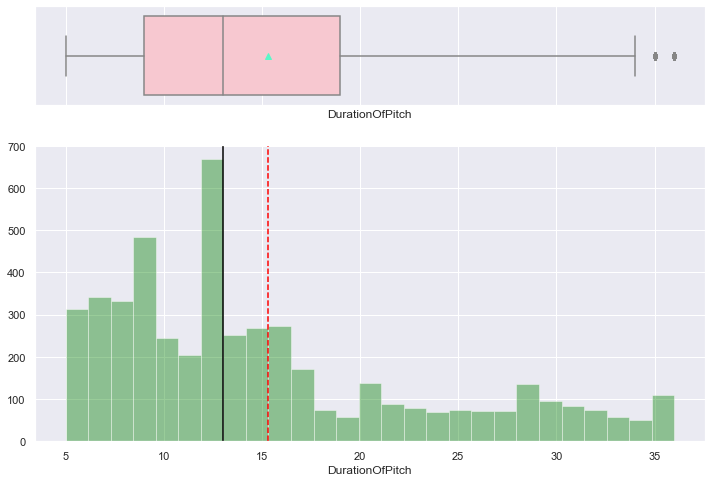

In [1450]:
histogram_boxplot(df['DurationOfPitch'])

In [1451]:
df.shape

(4886, 19)

**Observations:**
- The outliers for the `DurationOfPitch` that were over 120 minutes (2 rows) have now been dropped. 
- I decided to keep some outliers as they were the bulk of outliers (over 100 rows) & only a few minutes greater than the upper whisker limit. Also 35-40 minutes for a pitch is not unreasonable.

## Model Building

### Data Prep

In [1754]:
X = df.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X, columns = ['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus', 'Gender', 'Designation', 'CityTier', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'PreferredPropertyStar'],drop_first=True)
y = df['ProdTaken']

#### Split the data into train & test sets

In [1755]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(3421, 33) (1467, 33)


In [1756]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [1757]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

### Model Evaluation Criterion

#### Model can make wrong predications as:
1. Predicting a customer will buy a product & the customer does not purchase a product.
2. Predicting a customer will not buy a product & the customer does purchase a product.

#### Which case is more important?
- Predicting that a customer will not buy a product, but they do i.e. losing profit on the sell of a vacation package.

#### How to reduce this missed opportunity i.e. need to reduce False Negatives?
- Visit With Us wants **Recall** to be maximized, since the greater the Recall, the higher the chances are of minimizing false negatives. The focus should be on **increasing Recall** (or minimizing the false negatives) so that the company can reach out to customers more likely to purchase a vacation package. This way, a salesperson is able to maximize efficiency & the chance of selling a package when reaching out to customers about the new "Wellness Tourism Package".

### Build Decision Tree Model

In [1758]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [1759]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy on training set :  1.0
Accuracy on test set :  0.896387184730743
Recall on training set :  1.0
Recall on test set :  0.7318840579710145
Precision on training set :  1.0
Precision on test set :  0.7214285714285714


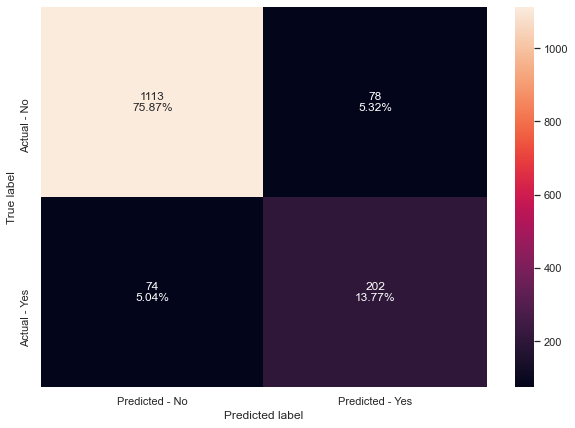

In [1807]:
# Fitting model
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

# Calculating different metrics 
get_metrics_score(dtree)

# Creating confusion matrix
make_confusion_matrix(dtree, y_test)

**Observations:**
- Customer bought a package & the model predicted it correctly (would buy): True Positive (observed=1, predicted=1)
- Customer didn't buy a package & the model predicted that they would buy one: False Positive (observed=0, predicted=1)
- Customer didn't buy a package & the model predicted it correctly (wouldn't buy): True Negative (observed=0, predicted=0)
- Customer bought a package & the model predicted that they would not buy one: False Negative (observed=1, predicted=0)


- False Negatives is 5.04%


- In regards to Recall, the decision tree is working well (too well, overfitting) on the training dataset, but not well on the test dataset.

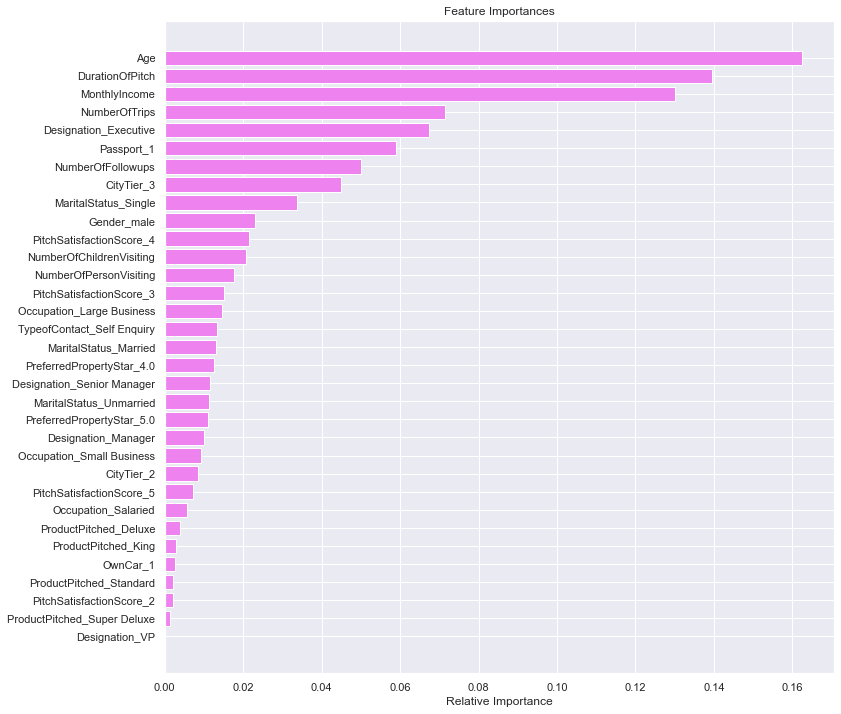

In [1857]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1858]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Age                          0.162571
DurationOfPitch              0.139607
MonthlyIncome                0.130043
NumberOfTrips                0.071429
Designation_Executive        0.067414
Passport_1                   0.059067
NumberOfFollowups            0.050126
CityTier_3                   0.044895
MaritalStatus_Single         0.033645
Gender_male                  0.023006
PitchSatisfactionScore_4     0.021606
NumberOfChildrenVisiting     0.020790
NumberOfPersonVisiting       0.017614
PitchSatisfactionScore_3     0.015142
Occupation_Large Business    0.014524
TypeofContact_Self Enquiry   0.013404
MaritalStatus_Married        0.013001
PreferredPropertyStar_4.0    0.012620
Designation_Senior Manager   0.011656
MaritalStatus_Unmarried      0.011171
PreferredPropertyStar_5.0    0.011014
Designation_Manager          0.010106
Occupation_Small Business    0.009271
CityTier_2                   0.008486
PitchSatisfactionScore_5     0.007133
Occupation_S

**Observations:**
- `Age`, `DurationOfPitch`, & `MonthlyIncome` are the most important features.

## Bagging Classifier

Accuracy on training set :  0.9947383805904706
Accuracy on test set :  0.918200408997955
Recall on training set :  0.9736024844720497
Recall on test set :  0.6413043478260869
Precision on training set :  0.9984076433121019
Precision on test set :  0.8939393939393939


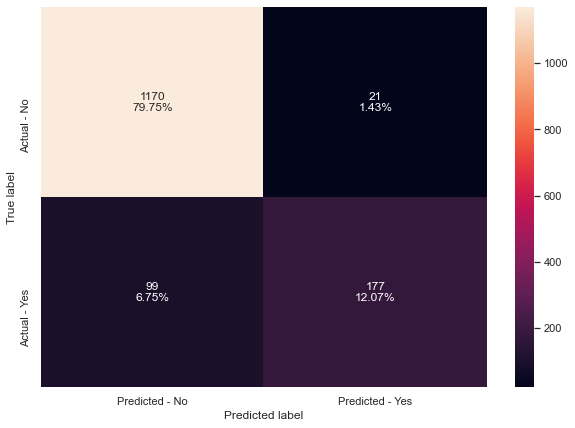

In [1808]:
#Fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging)

#Creating confusion matrix
make_confusion_matrix(bagging,y_test)

**Observations:**
- False Negatives are 6.75%.


- The bagging classifier is still overfitting the training set for recall at 0.9736. Recall on the test set is 0.6413

### Bagging Classifier with Weighted Decision Tree

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.8984321745057942
Recall on training set :  0.968944099378882
Recall on test set :  0.5688405797101449
Precision on training set :  1.0
Precision on test set :  0.839572192513369


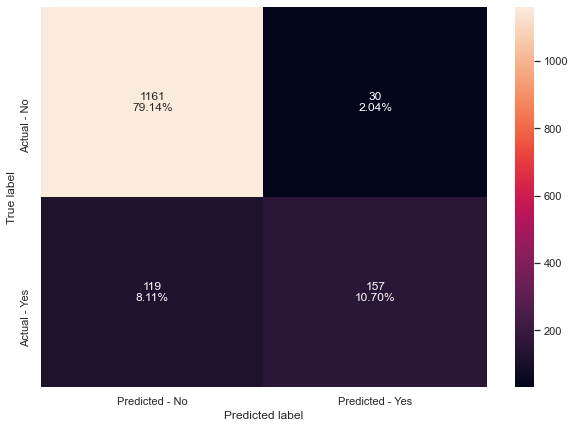

In [1762]:
#Fitting the model
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1))
bagging_wt.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_wt)

#Creating confusion matrix
make_confusion_matrix(bagging_wt,y_test)

**Observations:**
- The False Negatives on the confusion matrix increased when weighted to 8.11%, while we want it to decrease.


- Recall on the training set barely went down any & recall on the testing set went down to 0.5688.

## Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.9113837764144512
Recall on training set :  1.0
Recall on test set :  0.5797101449275363
Precision on training set :  1.0
Precision on test set :  0.9195402298850575


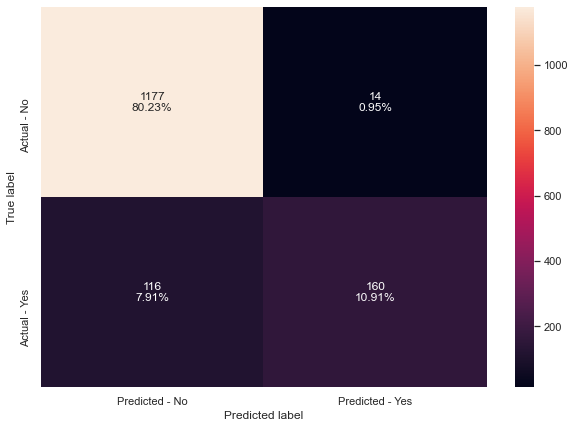

In [1763]:
# Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(rf)

#Creating confusion matrix
make_confusion_matrix(rf,y_test)

**Observtions:**
- The False Negatives in the confusion matrix is 7.91%.


- The recall on training data is 1; overfitting. The recall on the testing data is 0.5797. Random Forest is still not able to generalize well on the test data in terms of recall. It performed well in terms of accuracy & precision though.

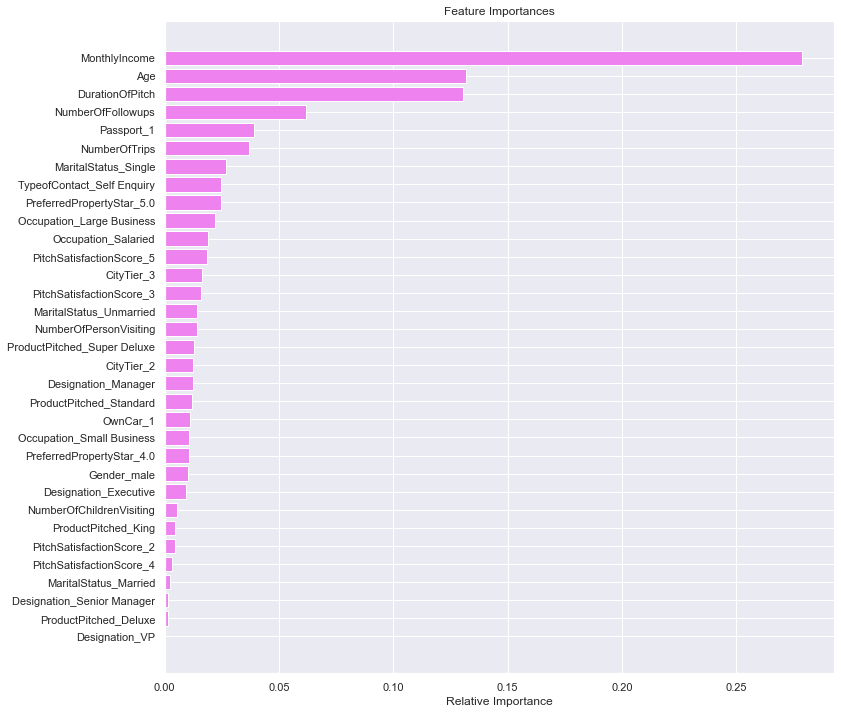

In [1815]:
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1855]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.123121
Age                          0.121113
DurationOfPitch              0.097190
Passport_1                   0.070095
NumberOfTrips                0.064487
NumberOfFollowups            0.053204
NumberOfChildrenVisiting     0.032044
CityTier_3                   0.029740
Designation_Executive        0.029372
NumberOfPersonVisiting       0.028072
MaritalStatus_Single         0.027402
Gender_male                  0.026295
PreferredPropertyStar_5.0    0.025260
TypeofContact_Self Enquiry   0.024229
PitchSatisfactionScore_3     0.021720
OwnCar_1                     0.021045
Occupation_Small Business    0.019619
Occupation_Salaried          0.019604
PitchSatisfactionScore_5     0.018810
PreferredPropertyStar_4.0    0.018789
PitchSatisfactionScore_4     0.018763
MaritalStatus_Married        0.016527
MaritalStatus_Unmarried      0.015868
Occupation_Large Business    0.015459
ProductPitched_Deluxe        0.010383
PitchSatisfa

**Observations:**
- `MonthlyIncome`, `Age`, & `DurationOfPitch` are the most important features.

### Random Forest with class weights

Accuracy on training set :  1.0
Accuracy on test set :  0.9093387866394002
Recall on training set :  1.0
Recall on test set :  0.5398550724637681
Precision on training set :  1.0
Precision on test set :  0.9612903225806452


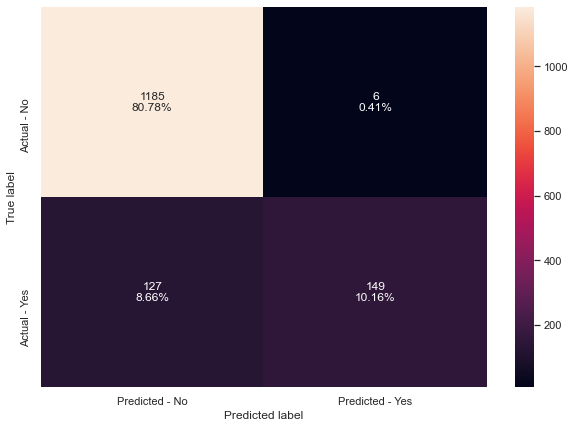

In [1764]:
# Fitting the model
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_wt)

#Creating confusion matrix
make_confusion_matrix(rf_wt, y_test)


**Observations:**
- When weighted, the False Negatives for the confusion matrix increased from 7.91% to 8.66%
- The recall on the training set remains at 1 while the recall on the test set decreased to 0.5399.
- The accuracy on the testing set decreased slightly & the precision on testing set increased to 0.9613.

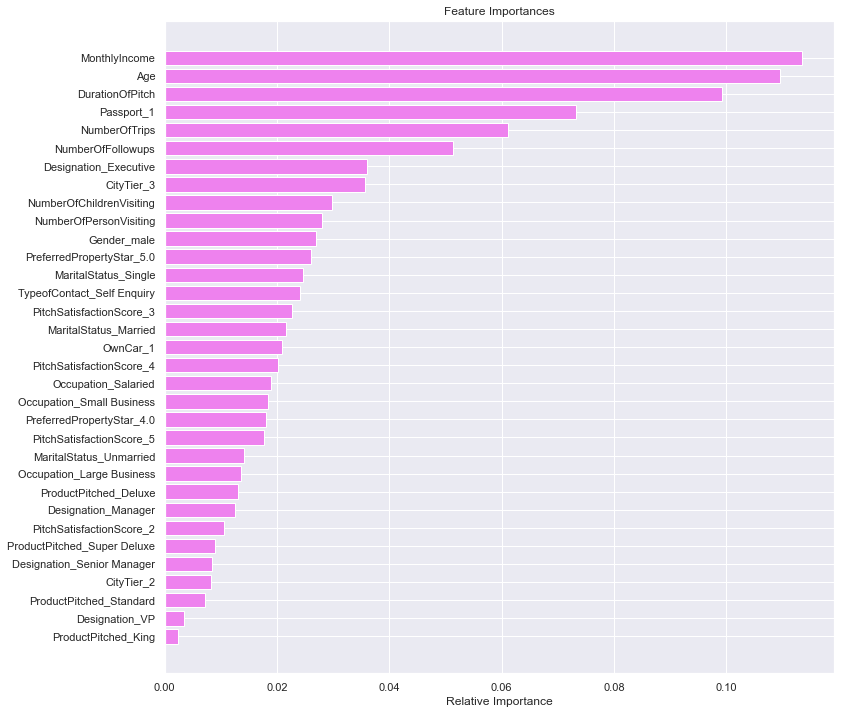

In [1862]:
importances = rf_wt.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1863]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_wt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.113558
Age                          0.109590
DurationOfPitch              0.099172
Passport_1                   0.073177
NumberOfTrips                0.061052
NumberOfFollowups            0.051256
Designation_Executive        0.036082
CityTier_3                   0.035656
NumberOfChildrenVisiting     0.029837
NumberOfPersonVisiting       0.028090
Gender_male                  0.026858
PreferredPropertyStar_5.0    0.026138
MaritalStatus_Single         0.024547
TypeofContact_Self Enquiry   0.024087
PitchSatisfactionScore_3     0.022694
MaritalStatus_Married        0.021524
OwnCar_1                     0.020934
PitchSatisfactionScore_4     0.020233
Occupation_Salaried          0.018972
Occupation_Small Business    0.018366
PreferredPropertyStar_4.0    0.018056
PitchSatisfactionScore_5     0.017744
MaritalStatus_Unmarried      0.014089
Occupation_Large Business    0.013573
ProductPitched_Deluxe        0.013055
Designation_

**Observations:**
- `MonthlyIncome`, `Age`, & `DurationOfPitch` are the most important features.

## Hyperparameter Tuning

### Using GridSearch for Hyperparameter tuning model

In [1809]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf' : [3, 5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       min_samples_leaf=3, random_state=1)

Accuracy on training set :  0.1882490499853844
Accuracy on test set :  0.18813905930470348
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.1882490499853844
Precision on test set :  0.18813905930470348


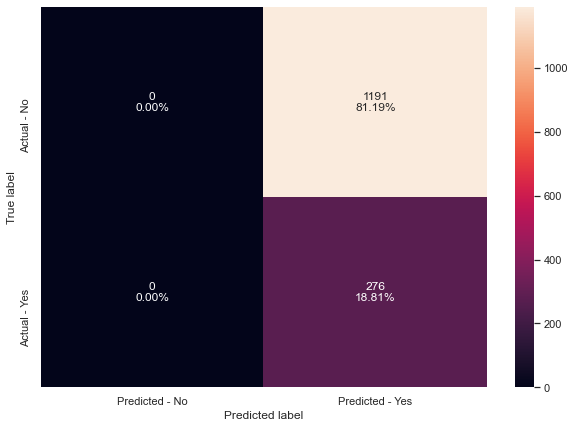

In [1810]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator, y_test)

**Observations:**
- False Negatives for the confusion matrix has been reduced to 0.


- The recall for the training & testing data sets have increased to 1. The accuracy & precision values on the training & testing sets have decreased drastically.

In [1865]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Age                          0.0
MaritalStatus_Unmarried      0.0
PreferredPropertyStar_4.0    0.0
OwnCar_1                     0.0
PitchSatisfactionScore_5     0.0
PitchSatisfactionScore_4     0.0
PitchSatisfactionScore_3     0.0
PitchSatisfactionScore_2     0.0
Passport_1                   0.0
CityTier_3                   0.0
CityTier_2                   0.0
Designation_VP               0.0
Designation_Senior Manager   0.0
Designation_Manager          0.0
Designation_Executive        0.0
Gender_male                  0.0
MaritalStatus_Single         0.0
DurationOfPitch              0.0
MaritalStatus_Married        0.0
ProductPitched_Super Deluxe  0.0
ProductPitched_Standard      0.0
ProductPitched_King          0.0
ProductPitched_Deluxe        0.0
Occupation_Small Business    0.0
Occupation_Salaried          0.0
Occupation_Large Business    0.0
TypeofContact_Self Enquiry   0.0
MonthlyIncome                0.0
NumberOfChildrenVisiting     0.0
NumberOfTr

### Tuning Bagging Classifier

In [1777]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.929107021131561
Recall on training set :  0.9984472049689441
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.9257425742574258


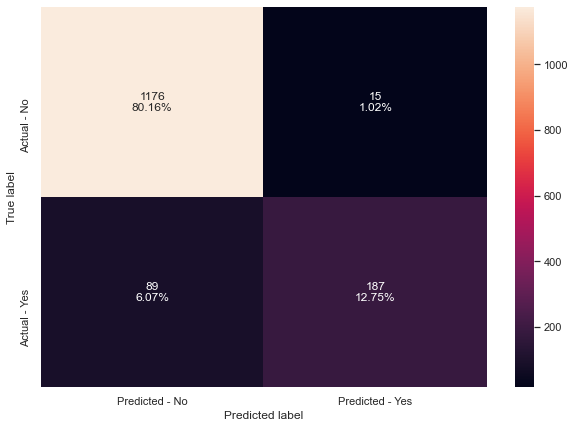

In [1778]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

**Observations:**
- Tuned Bagging has a False Negatives score of 6.07% & lowest it has been so far for Bagging.


- Recall on the training set has increased to 0.9984 & the recall has increased 0.6775.

### Tuning Random Forest (1st set of hyperparameters)

In [1779]:
# Choose the type of classifier
rf_estimator = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1)
}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=4,
                       max_features=0.6, max_samples=0.8999999999999999,
                       random_state=1)

Accuracy on training set :  0.819935691318328
Accuracy on test set :  0.8214042263122018
Recall on training set :  0.6583850931677019
Recall on test set :  0.6557971014492754
Precision on training set :  0.5170731707317073
Precision on test set :  0.5201149425287356


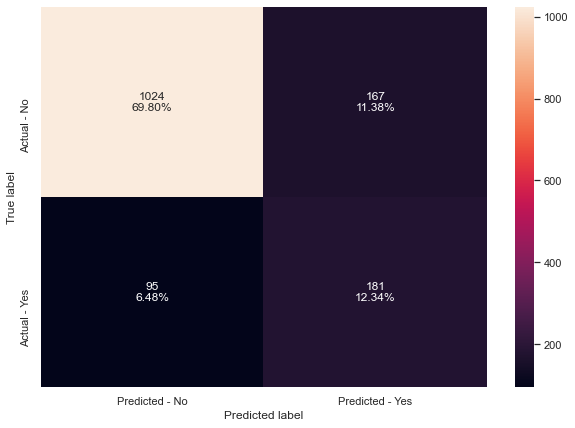

In [1780]:
#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

**Observations:**
- The tuned random forest's False Negatives is 6.48%, which is a decrease from both the original and the one with class weights.


- The recall on the training set has dropped low to 0.6584 while the testing data hasincreased to 0.6558.

In [1867]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport_1                   0.287244
Designation_Executive        0.168946
CityTier_3                   0.089208
Age                          0.083592
MaritalStatus_Single         0.064168
MonthlyIncome                0.058237
DurationOfPitch              0.048990
NumberOfFollowups            0.030555
MaritalStatus_Married        0.030397
PreferredPropertyStar_5.0    0.024859
NumberOfTrips                0.019109
MaritalStatus_Unmarried      0.013879
Occupation_Large Business    0.012167
Designation_Manager          0.009177
Designation_Senior Manager   0.008453
ProductPitched_Super Deluxe  0.007419
PitchSatisfactionScore_4     0.005402
ProductPitched_Deluxe        0.005267
ProductPitched_Standard      0.004758
Gender_male                  0.004423
OwnCar_1                     0.003700
PitchSatisfactionScore_5     0.003696
PitchSatisfactionScore_3     0.002894
NumberOfChildrenVisiting     0.002699
NumberOfPersonVisiting       0.002488
Occupation_S

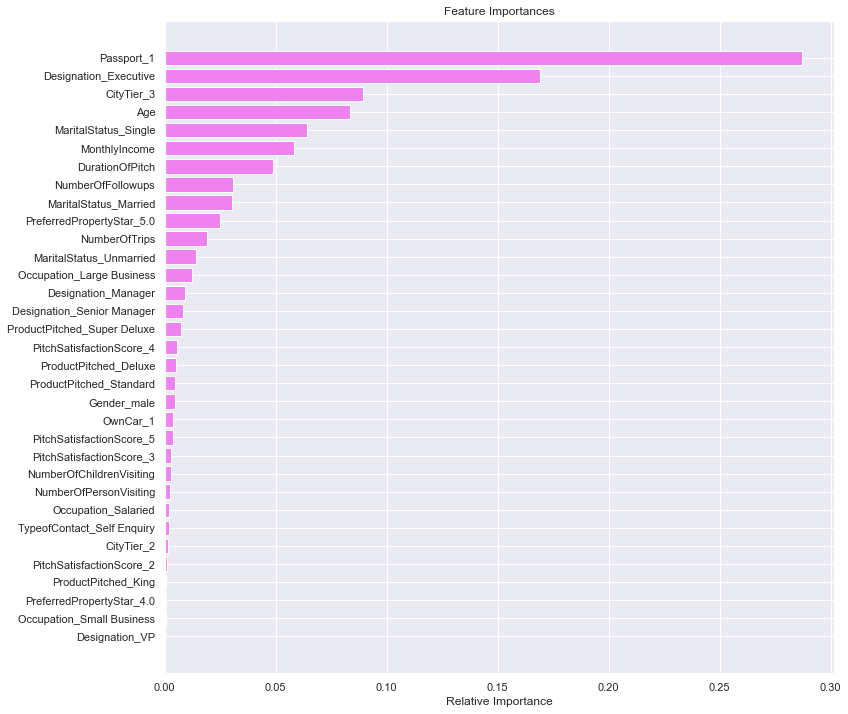

In [1868]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- Having a `Passport` & `Designation` as Executive are the most important features for the 1st tuned Random Forest. The 3rd most important feature is being in `CityTier` 3.

### Tuning Random Forest (2nd set of hyperparameters)

In [1783]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

parameters = {  
                'min_samples_split': np.arange(2, 10, 5),
                'n_estimators': np.arange(30,100,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.17, 1: 0.83},
                       min_impurity_decrease=0.1, n_estimators=30,
                       random_state=1)

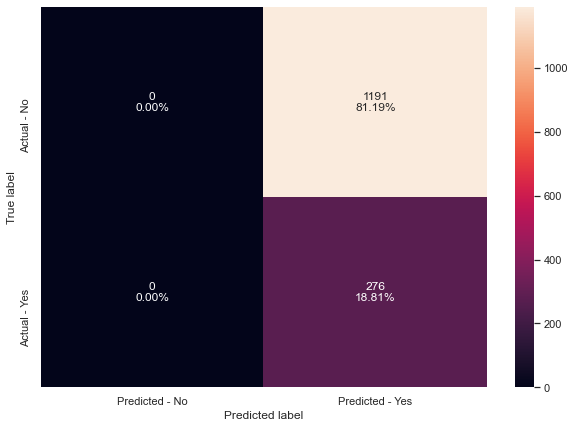

In [1784]:
make_confusion_matrix(rf_estimator_tuned, y_test)

In [1785]:
tuned_rf_acc = get_accuracy_score(rf_estimator_tuned)
tuned_rf_recall = get_recall_score(rf_estimator_tuned)
tuned_rf_precision = get_precision_score(rf_estimator_tuned)

Accuracy on training set :  0.1882490499853844
Accuracy on test set :  0.18813905930470348
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.1882490499853844
Precision on test set :  0.18813905930470348


**Observations:**
- Again, the False Negatives for the confusion matrix has been reduced to 0.


- Also, the recall for the training & testing data sets have increased to 1. The accuracy & precision values on the training & testing sets have decreased drastically. These values match the recall on the training/testing set for the tuned decision tree.

In [1786]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Age                          0.0
MaritalStatus_Unmarried      0.0
PreferredPropertyStar_4.0    0.0
OwnCar_1                     0.0
PitchSatisfactionScore_5     0.0
PitchSatisfactionScore_4     0.0
PitchSatisfactionScore_3     0.0
PitchSatisfactionScore_2     0.0
Passport_1                   0.0
CityTier_3                   0.0
CityTier_2                   0.0
Designation_VP               0.0
Designation_Senior Manager   0.0
Designation_Manager          0.0
Designation_Executive        0.0
Gender_male                  0.0
MaritalStatus_Single         0.0
DurationOfPitch              0.0
MaritalStatus_Married        0.0
ProductPitched_Super Deluxe  0.0
ProductPitched_Standard      0.0
ProductPitched_King          0.0
ProductPitched_Deluxe        0.0
Occupation_Small Business    0.0
Occupation_Salaried          0.0
Occupation_Large Business    0.0
TypeofContact_Self Enquiry   0.0
MonthlyIncome                0.0
NumberOfChildrenVisiting     0.0
NumberOfTr

## Comparing all the models

In [1787]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator_tuned,rf,rf_wt,rf_estimator, rf_estimator_tuned]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    

In [1788]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier', 'Weighted Bagging Classifier',
                                          'Bagging Classifier Tuned', 'Random Forest','Weighted Random Forest', 'Tuned Random Forest 1',
                                          'Tuned Random Forest 2'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
1,Tuned Decision Tree,0.188249,0.188139,1.000000,1.000000,0.188249,0.188139
8,Tuned Random Forest 2,0.188249,0.188139,1.000000,1.000000,0.188249,0.188139
0,Decision Tree,1.000000,0.880709,1.000000,0.706522,1.000000,0.674740
4,Bagging Classifier Tuned,0.999708,0.929107,0.998447,0.677536,1.000000,0.925743
7,Tuned Random Forest 1,0.819936,0.821404,0.658385,0.655797,0.517073,0.520115
2,Bagging Classifier,0.994738,0.918200,0.973602,0.641304,0.998408,0.893939
5,Random Forest,1.000000,0.911384,1.000000,0.579710,1.000000,0.919540
3,Weighted Bagging Classifier,0.994154,0.898432,0.968944,0.568841,1.000000,0.839572
6,Weighted Random Forest,1.000000,0.909339,1.000000,0.539855,1.000000,0.961290


## Boosting Classifiers

In [1789]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### AdaBoost Classifier

In [1790]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Accuracy on training set :  0.8456591639871383
Accuracy on test set :  0.847307430129516
Recall on training set :  0.3090062111801242
Recall on test set :  0.32608695652173914
Precision on training set :  0.7056737588652482
Precision on test set :  0.703125


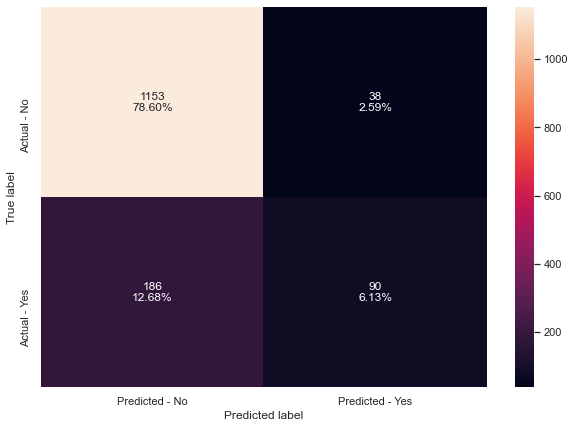

In [1791]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

make_confusion_matrix(abc,y_test)

**Observations:**
- The False Negatives for the AdaBoost is 12.68%, the highest this False Negatives score has been so far.


- The recall on the training & testing data sets are quite low at 0.3090 & 0.3261, respectively.

In [1870]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(abc.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
MonthlyIncome                0.28
Age                          0.14
DurationOfPitch              0.08
NumberOfFollowups            0.08
NumberOfTrips                0.06
PreferredPropertyStar_5.0    0.04
NumberOfPersonVisiting       0.04
Designation_Executive        0.02
MaritalStatus_Unmarried      0.02
PreferredPropertyStar_4.0    0.02
PitchSatisfactionScore_4     0.02
PitchSatisfactionScore_3     0.02
Passport_1                   0.02
CityTier_3                   0.02
CityTier_2                   0.02
TypeofContact_Self Enquiry   0.02
Gender_male                  0.02
MaritalStatus_Single         0.02
ProductPitched_Super Deluxe  0.02
ProductPitched_Standard      0.02
Occupation_Large Business    0.02
MaritalStatus_Married        0.00
Designation_Manager          0.00
Designation_Senior Manager   0.00
Designation_VP               0.00
ProductPitched_King          0.00
ProductPitched_Deluxe        0.00
PitchSatisfactionScore_2     0.00
Occupation_Sma

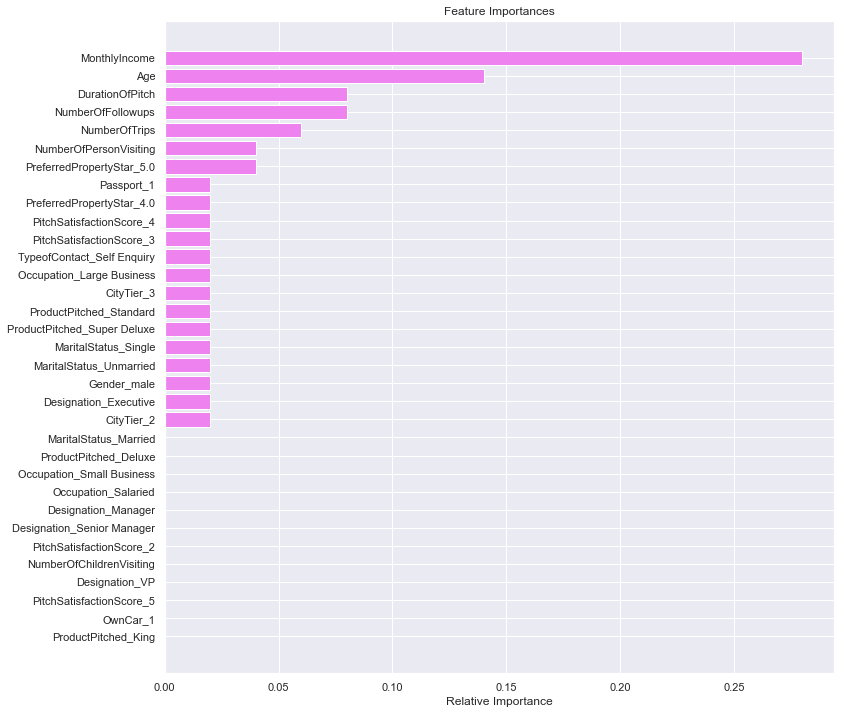

In [1871]:
importances = abc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- `MonthlyIncome`, `Age`, & `DurationOfPitch` are the most important variables for the AdaBoost Classifier.

### Gradient Boosting Classifier

In [1792]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Accuracy on training set :  0.8859982461268635
Accuracy on test set :  0.8684389911383776
Recall on training set :  0.4518633540372671
Recall on test set :  0.39492753623188404
Precision on training set :  0.8871951219512195
Precision on test set :  0.8074074074074075


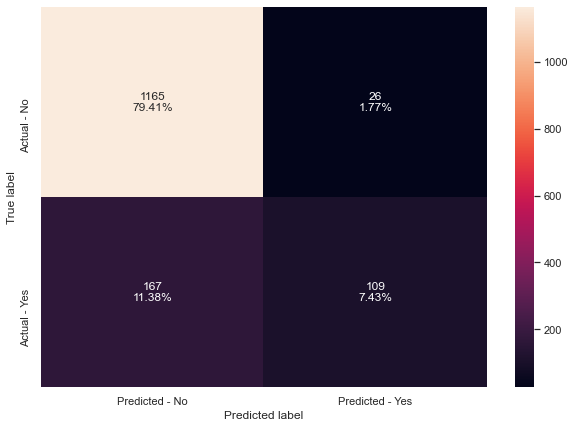

In [1793]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

make_confusion_matrix(gbc,y_test)

**Observations:**

- The confusion matrix false negatives score is 11.38%.
- The recall on the training data set is 0.4518 & testing data set is 0.0394.

In [1875]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gbc.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport_1                   0.170709
MonthlyIncome                0.131179
Age                          0.127321
Designation_Executive        0.118527
DurationOfPitch              0.074752
CityTier_3                   0.060614
MaritalStatus_Single         0.058414
NumberOfFollowups            0.053180
NumberOfTrips                0.036346
MaritalStatus_Unmarried      0.028214
PreferredPropertyStar_5.0    0.020891
CityTier_2                   0.015347
TypeofContact_Self Enquiry   0.011949
Occupation_Large Business    0.011831
PitchSatisfactionScore_3     0.010678
NumberOfPersonVisiting       0.008941
ProductPitched_Standard      0.008235
Designation_Manager          0.006546
MaritalStatus_Married        0.006383
Designation_Senior Manager   0.006216
PitchSatisfactionScore_2     0.005988
ProductPitched_Super Deluxe  0.005695
PitchSatisfactionScore_5     0.005124
PitchSatisfactionScore_4     0.004563
ProductPitched_Deluxe        0.003792
Gender_male 

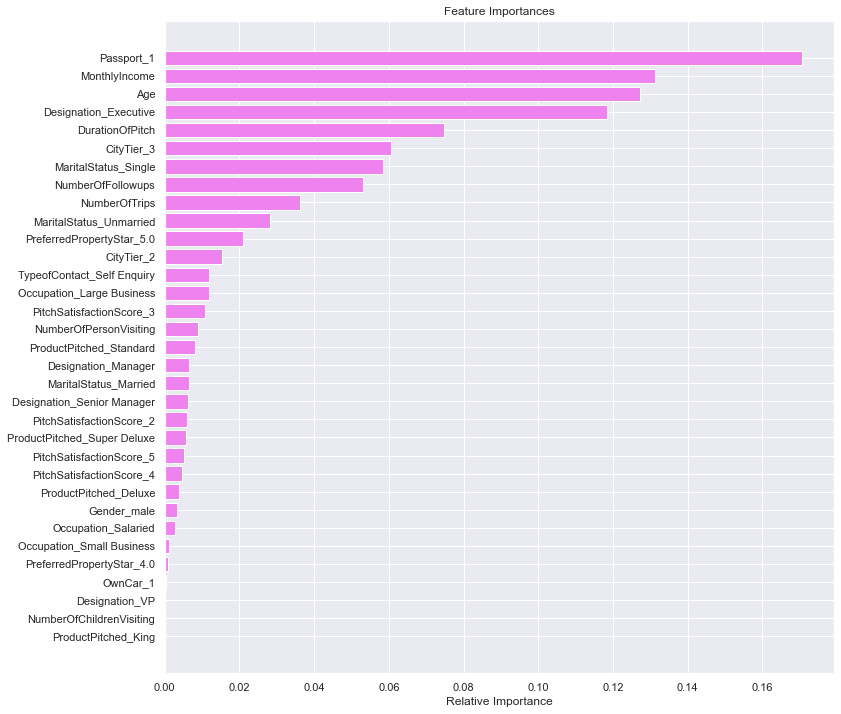

In [1876]:
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- Having a `Passport`, `MonthlyIncome`, `Age`, & `Designation` Executive are the most important variables for the Gradient Boosting Classifier.

### XGBoost Classifier

In [1802]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train, eval_metric = 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.9318336741649625
Recall on training set :  0.9953416149068323
Recall on test set :  0.7210144927536232
Precision on training set :  1.0
Precision on test set :  0.8963963963963963


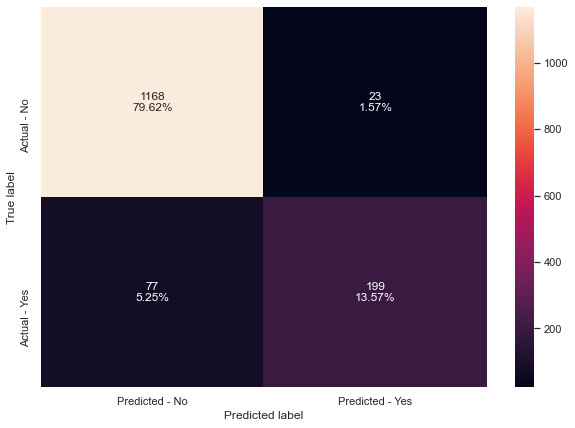

In [1803]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

make_confusion_matrix(xgb,y_test)

**Observations:**
- XGBoost has had the best results yet (besides the original Decision Tree) with False Negatives at 5.25%, recall training dataset at 0.9953, & recall test dataset at 0.7210.

In [1877]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Designation_Executive        0.109629
Passport_1                   0.071100
ProductPitched_King          0.049246
MaritalStatus_Single         0.047120
CityTier_3                   0.042691
ProductPitched_Super Deluxe  0.039168
Occupation_Large Business    0.038664
CityTier_2                   0.036626
MaritalStatus_Unmarried      0.035264
PitchSatisfactionScore_4     0.034901
ProductPitched_Standard      0.033509
ProductPitched_Deluxe        0.032467
NumberOfFollowups            0.031837
NumberOfTrips                0.029249
Age                          0.027903
DurationOfPitch              0.027516
PreferredPropertyStar_4.0    0.026597
MaritalStatus_Married        0.026269
Gender_male                  0.025835
PreferredPropertyStar_5.0    0.025806
PitchSatisfactionScore_5     0.025235
TypeofContact_Self Enquiry   0.024719
Occupation_Salaried          0.024023
PitchSatisfactionScore_3     0.023532
MonthlyIncome                0.023415
Occupation_S

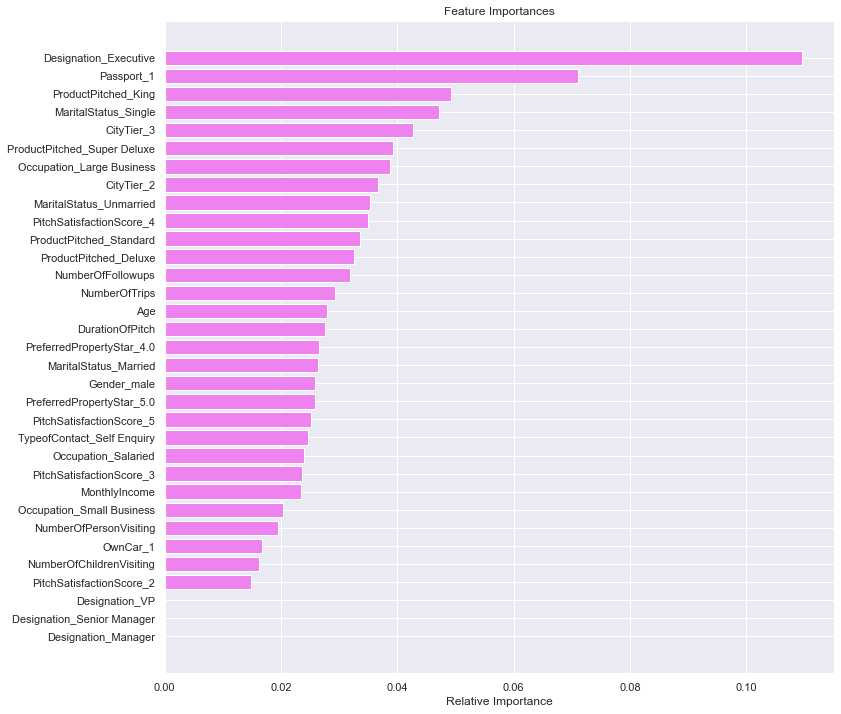

In [1878]:
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- `Designation` Executive & having a `Passport` are the most important variables for the XGBoost Classifier.

## Hyperparameter Tuning

### Tuning AdaBoost Classifier 1

In [1813]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   random_state=1)

Accuracy on training set :  0.9429991230634317
Accuracy on test set :  0.8663940013633266
Recall on training set :  0.765527950310559
Recall on test set :  0.5797101449275363
Precision on training set :  0.9180633147113594
Precision on test set :  0.6666666666666666


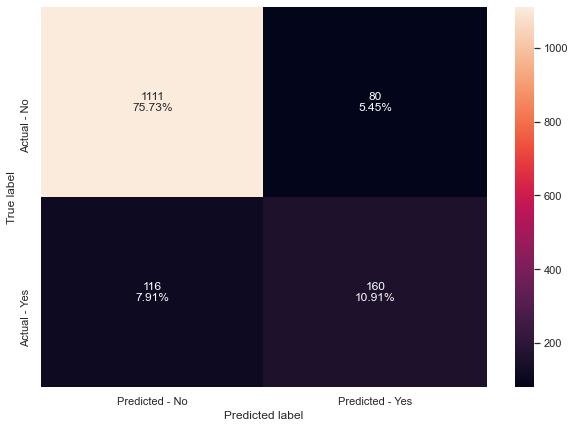

In [1814]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score = get_metrics_score(abc_tuned)

make_confusion_matrix(abc_tuned,y_test)

**Observations:**
- Tuning the max_depth has decreased the False Negatives from 12.68% to 7.91%.
- The testing & training data has improved from the default settings Adaboost to 0.7655 & 0.5797, respectively.

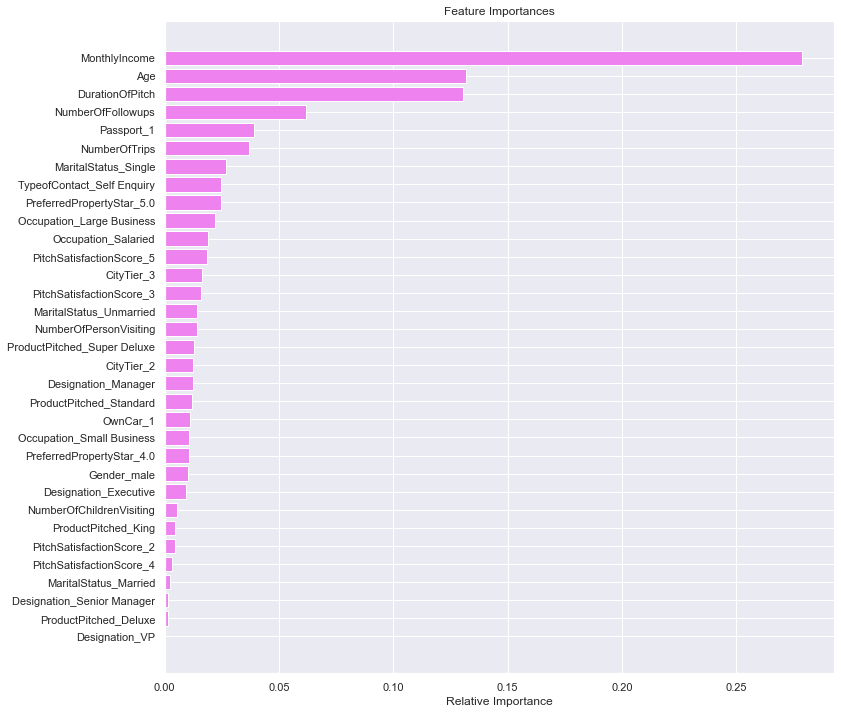

In [1815]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1817]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.278853
Age                          0.131580
DurationOfPitch              0.130529
NumberOfFollowups            0.061840
Passport_1                   0.038918
NumberOfTrips                0.036801
MaritalStatus_Single         0.026904
TypeofContact_Self Enquiry   0.024829
PreferredPropertyStar_5.0    0.024741
Occupation_Large Business    0.022032
Occupation_Salaried          0.019097
PitchSatisfactionScore_5     0.018514
CityTier_3                   0.016476
PitchSatisfactionScore_3     0.015796
MaritalStatus_Unmarried      0.014303
NumberOfPersonVisiting       0.014096
ProductPitched_Super Deluxe  0.012903
CityTier_2                   0.012482
Designation_Manager          0.012345
ProductPitched_Standard      0.012120
OwnCar_1                     0.010912
Occupation_Small Business    0.010787
PreferredPropertyStar_4.0    0.010693
Gender_male                  0.010017
Designation_Executive        0.009518
NumberOfChil

**Observations:**
- The most important variables for tuned adaboost 1 is `MonthlyIncome`, `Age`, & `DurationOfPitch`.

### Tuning AdaBoost Classifier 2

In [1818]:
# Choose the type of classifier. 
abc_tuned2 = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned2.fit(X_train, y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.8000000000000003, n_estimators=100,
                   random_state=1)

Accuracy on training set :  0.9429991230634317
Accuracy on test set :  0.8663940013633266
Recall on training set :  0.765527950310559
Recall on test set :  0.5797101449275363
Precision on training set :  0.9180633147113594
Precision on test set :  0.6666666666666666


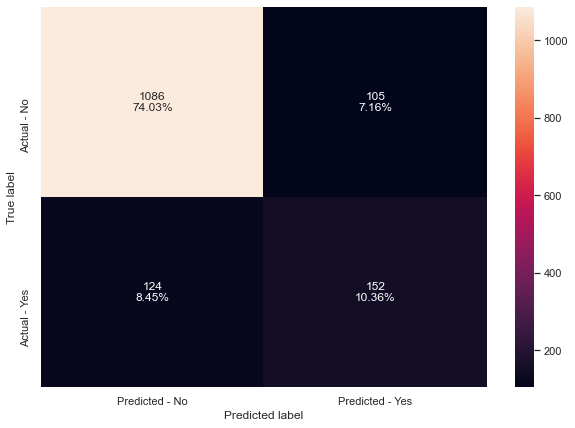

In [1819]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score2 = get_metrics_score(abc_tuned)

make_confusion_matrix(abc_tuned2,y_test)

**Observations:**
- Compared to tuned AdaBoost 1 the false negatives has increased to 8.45%, while the recall training & test data set scores have remained the same.

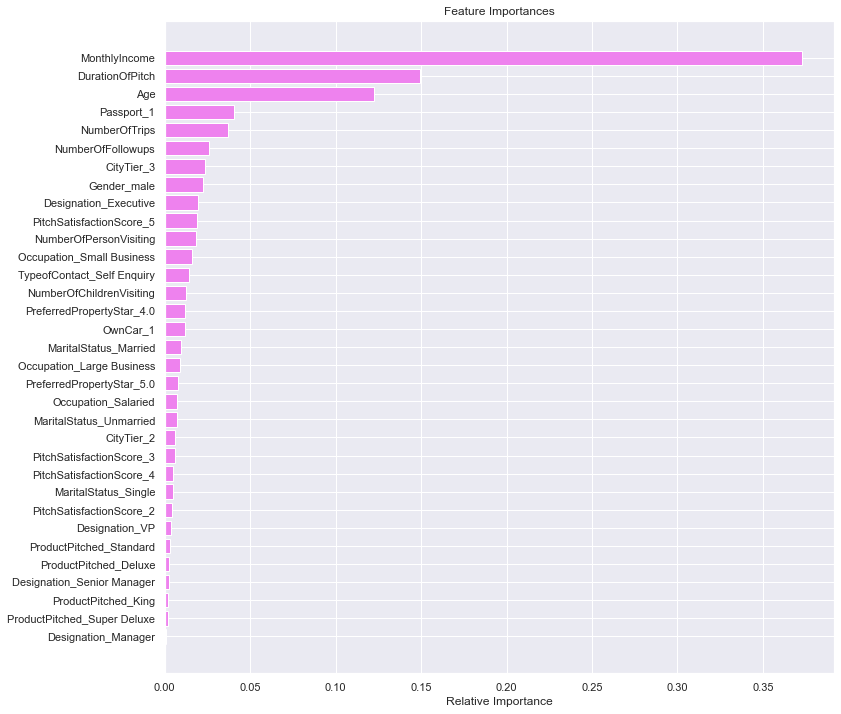

In [1820]:
importances = abc_tuned2.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1821]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(abc_tuned2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.373113
DurationOfPitch              0.149560
Age                          0.122549
Passport_1                   0.040305
NumberOfTrips                0.036956
NumberOfFollowups            0.026069
CityTier_3                   0.023766
Gender_male                  0.022397
Designation_Executive        0.019744
PitchSatisfactionScore_5     0.018666
NumberOfPersonVisiting       0.018371
Occupation_Small Business    0.015730
TypeofContact_Self Enquiry   0.014025
NumberOfChildrenVisiting     0.012274
PreferredPropertyStar_4.0    0.011922
OwnCar_1                     0.011828
MaritalStatus_Married        0.009662
Occupation_Large Business    0.008936
PreferredPropertyStar_5.0    0.007714
Occupation_Salaried          0.007374
MaritalStatus_Unmarried      0.007069
CityTier_2                   0.006199
PitchSatisfactionScore_3     0.005927
PitchSatisfactionScore_4     0.005015
MaritalStatus_Single         0.004883
PitchSatisfa

**Observations:**
- For Tuned AdaBoost 2, the most important factors are `MonthlyIncome`, `DurationOfPitch`, & `Age`. 
- `DurationOfPitch `& `Age` switch ranks from the first tuned AdaBoost.

### Tuning Gradient Boosting Classifier

#### Trying AdaBoost classifier as the estimator for the initial predictions

In [1824]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

Accuracy on training set :  0.8880444314527915
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.453416149068323
Recall on test set :  0.37318840579710144
Precision on training set :  0.9040247678018576
Precision on test set :  0.8110236220472441


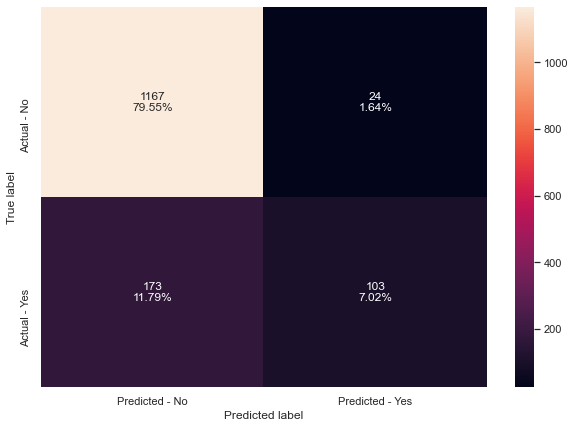

In [1826]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

make_confusion_matrix(gbc_init, y_test)

**Observations:**
- When compared to the Gradient Boost model with the default parameters, the False Negatives score has increased to 11.79% from 11.38%.
- The recall training score has increased ever so slightly to 0.4534. The recall testing score has decreased to 0.3732.

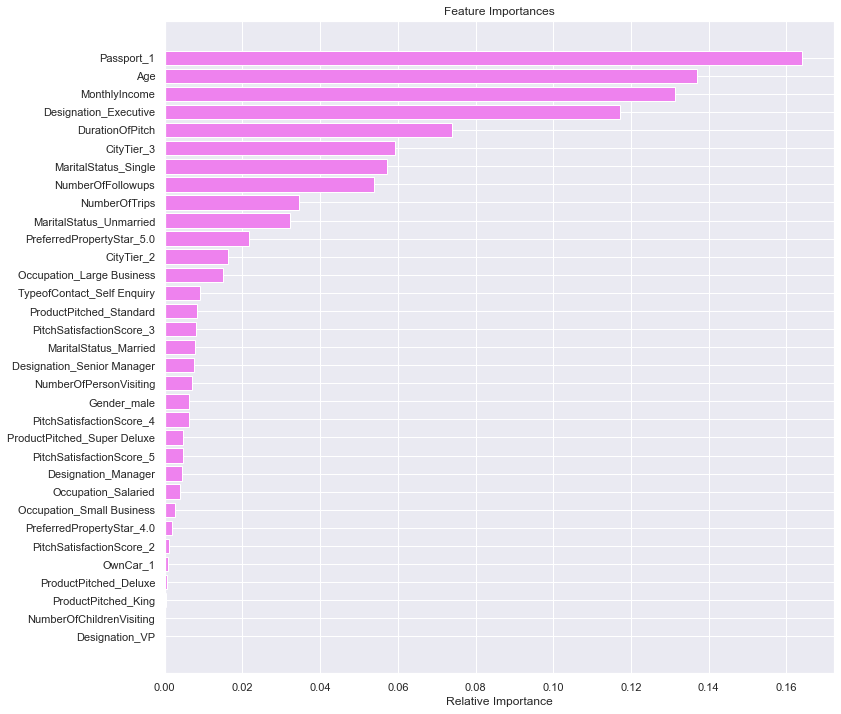

In [1827]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1828]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gbc_init.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport_1                   0.164139
Age                          0.137129
MonthlyIncome                0.131393
Designation_Executive        0.117158
DurationOfPitch              0.074060
CityTier_3                   0.059394
MaritalStatus_Single         0.057316
NumberOfFollowups            0.053875
NumberOfTrips                0.034525
MaritalStatus_Unmarried      0.032236
PreferredPropertyStar_5.0    0.021813
CityTier_2                   0.016355
Occupation_Large Business    0.015028
TypeofContact_Self Enquiry   0.009150
ProductPitched_Standard      0.008221
PitchSatisfactionScore_3     0.008160
MaritalStatus_Married        0.007894
Designation_Senior Manager   0.007585
NumberOfPersonVisiting       0.007013
Gender_male                  0.006371
PitchSatisfactionScore_4     0.006354
ProductPitched_Super Deluxe  0.004667
PitchSatisfactionScore_5     0.004617
Designation_Manager          0.004428
Occupation_Salaried          0.003855
Occupation_S

**Observations:**
- The most important features for tuned gradient boosting is `Passport_1` (customer has a passport), `Age`, & `MonthlyIncome`.

### Tuned Gradient Boosting

In [1833]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

Accuracy on training set :  0.9196141479099679
Accuracy on test set :  0.874573960463531
Recall on training set :  0.6195652173913043
Recall on test set :  0.4601449275362319
Precision on training set :  0.9300699300699301
Precision on test set :  0.7839506172839507


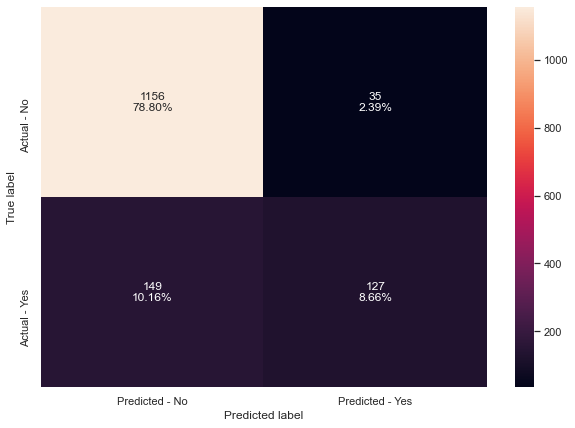

In [1834]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

make_confusion_matrix(gbc_tuned,y_test)

**Observations:**
- Tuned gradient is the best model out of all the gradient models. False Negatives decreased from the adaaboost classifier for initial predictions to 10.16%. The recall training score has increased to 0.6196 & the recall test score has increased to 0.4614.

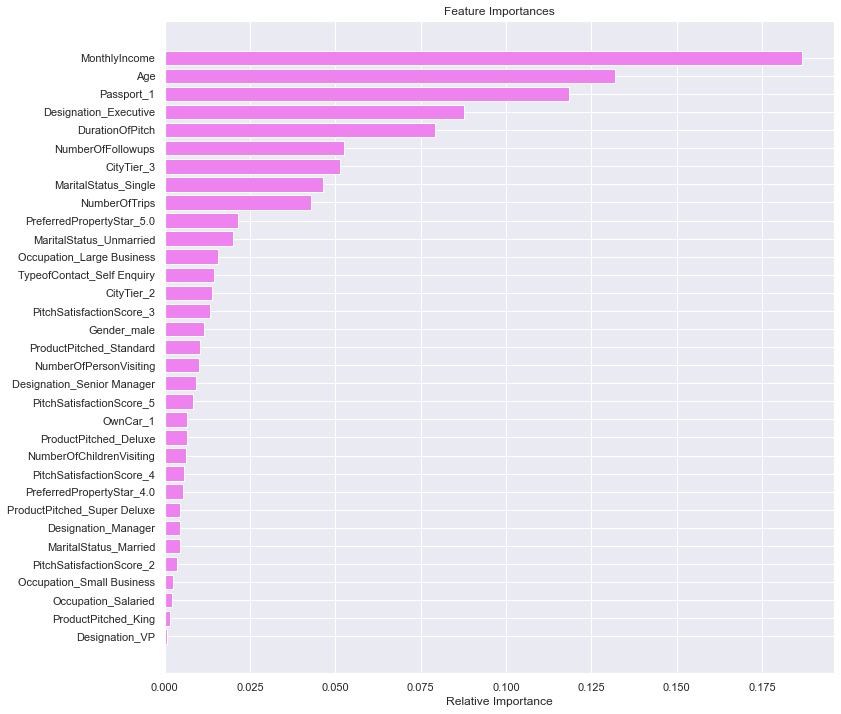

In [1835]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1836]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.186878
Age                          0.131921
Passport_1                   0.118506
Designation_Executive        0.087633
DurationOfPitch              0.079129
NumberOfFollowups            0.052537
CityTier_3                   0.051407
MaritalStatus_Single         0.046381
NumberOfTrips                0.042899
PreferredPropertyStar_5.0    0.021617
MaritalStatus_Unmarried      0.020093
Occupation_Large Business    0.015723
TypeofContact_Self Enquiry   0.014561
CityTier_2                   0.013945
PitchSatisfactionScore_3     0.013410
Gender_male                  0.011443
ProductPitched_Standard      0.010318
NumberOfPersonVisiting       0.009947
Designation_Senior Manager   0.009058
PitchSatisfactionScore_5     0.008284
OwnCar_1                     0.006589
ProductPitched_Deluxe        0.006449
NumberOfChildrenVisiting     0.006242
PitchSatisfactionScore_4     0.005799
PreferredPropertyStar_4.0    0.005342
ProductPitch

**Observations:**
- The most important variables are the same as the gradient adaboost classifier, but in a different order (`MonthlyIncome`, `Age`, and `Passport_1`)

### Tuned XGBoost Classifier 1

In [1837]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "eval_metric": ['logloss']
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.8976907337035954
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.9161490683229814
Recall on test set :  0.7898550724637681
Precision on training set :  0.6659142212189616
Precision on test set :  0.5736842105263158


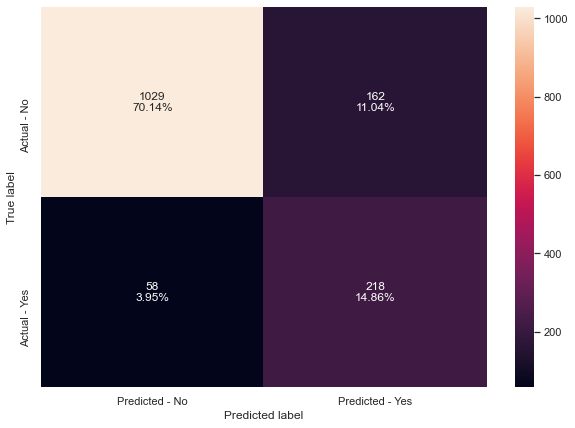

In [1839]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

make_confusion_matrix(xgb_tuned,y_test)

**Observations:**
- XGBoost 1 has a False Negatives score of 3.95%
- The recall training score is 0.9161 & recall test score is 0.7899. 
- These scores seem to be the best so far, with the False Negatives & recall testing score being the highest out of all models. The recall training score is not the highest at all models, but it is no longer overfitting.

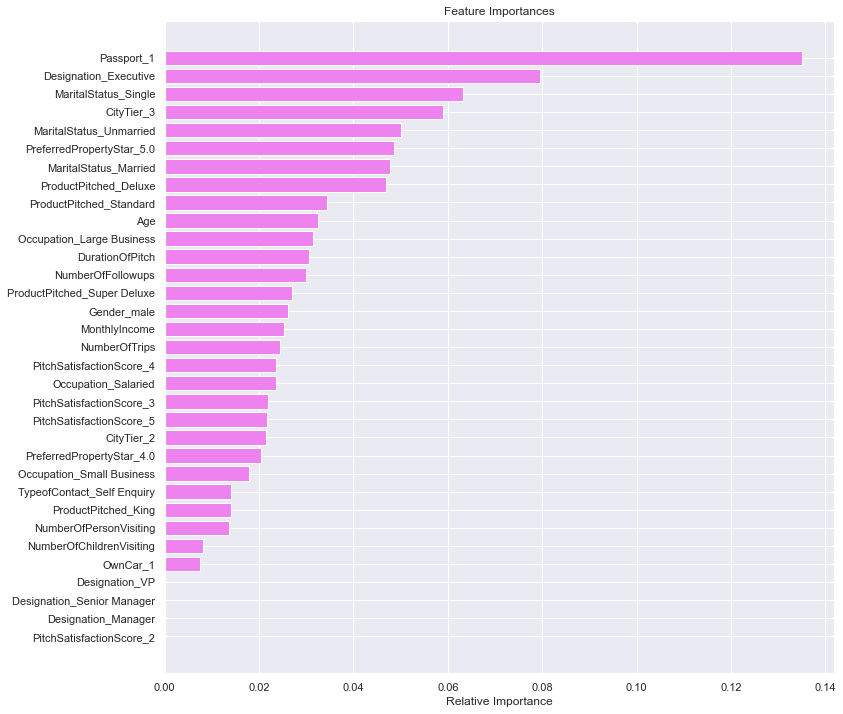

In [1848]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1847]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport_1                   0.135113
Designation_Executive        0.079484
MaritalStatus_Single         0.063270
CityTier_3                   0.058966
MaritalStatus_Unmarried      0.050059
PreferredPropertyStar_5.0    0.048639
MaritalStatus_Married        0.047803
ProductPitched_Deluxe        0.046989
ProductPitched_Standard      0.034440
Age                          0.032545
Occupation_Large Business    0.031326
DurationOfPitch              0.030666
NumberOfFollowups            0.029977
ProductPitched_Super Deluxe  0.026913
Gender_male                  0.026189
MonthlyIncome                0.025350
NumberOfTrips                0.024419
PitchSatisfactionScore_4     0.023662
Occupation_Salaried          0.023542
PitchSatisfactionScore_3     0.021932
PitchSatisfactionScore_5     0.021583
CityTier_2                   0.021380
PreferredPropertyStar_4.0    0.020475
Occupation_Small Business    0.017872
TypeofContact_Self Enquiry   0.014082
ProductPitch

**Observations:**
- For the XGBoost Classifier 1 the most important variable is Passport_1.

### Tuned XGBoost Classifier 2

In [1843]:
# Choose the type of classifier. 
xgb_tuned2 = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1],
    "eval_metric": ['logloss']
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned2.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.8319204910844782
Accuracy on test set :  0.8050443081117927
Recall on training set :  0.8835403726708074
Recall on test set :  0.8297101449275363
Precision on training set :  0.5322731524789522
Precision on test set :  0.4893162393162393


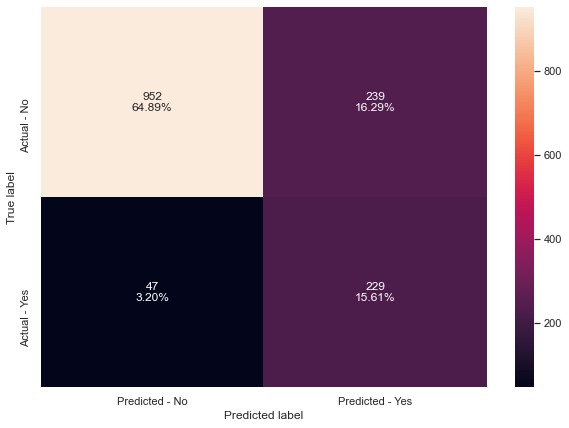

In [1844]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned2)

make_confusion_matrix(xgb_tuned2,y_test)

**Observations:**
- False Negatives is the best score at 3.20&
- The recall training score is pretty good, although it has decreased some from the tuned XGBoost 1 to 0.8835. The recall test score has increased to 0.8297.

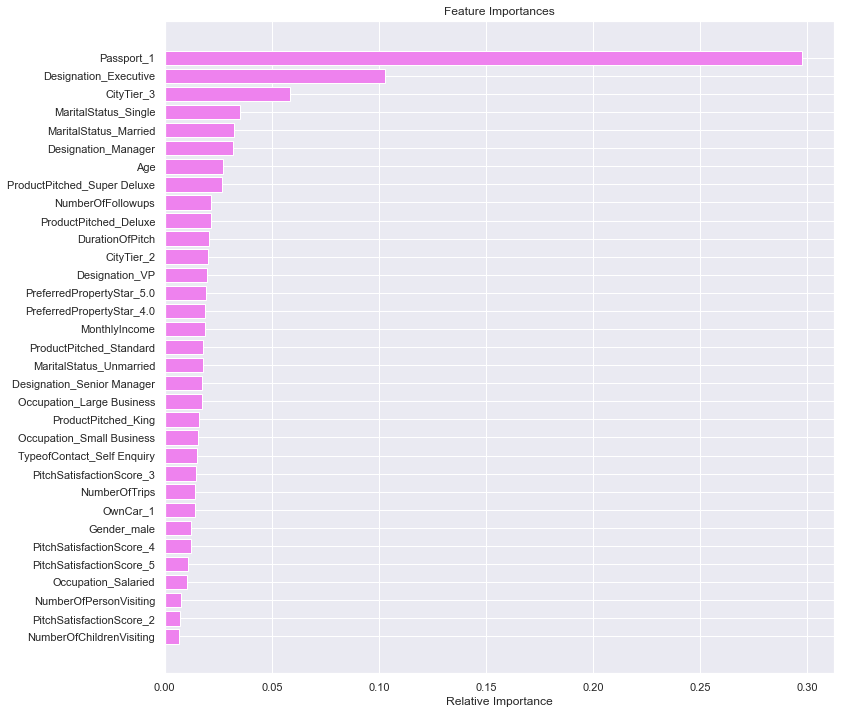

In [1852]:
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1850]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport_1                   0.297648
Designation_Executive        0.102959
CityTier_3                   0.058365
MaritalStatus_Single         0.035307
MaritalStatus_Married        0.032460
Designation_Manager          0.031680
Age                          0.027390
ProductPitched_Super Deluxe  0.026862
NumberOfFollowups            0.021558
ProductPitched_Deluxe        0.021475
DurationOfPitch              0.020704
CityTier_2                   0.020421
Designation_VP               0.019656
PreferredPropertyStar_5.0    0.019493
PreferredPropertyStar_4.0    0.018940
MonthlyIncome                0.018616
ProductPitched_Standard      0.017836
MaritalStatus_Unmarried      0.017724
Designation_Senior Manager   0.017607
Occupation_Large Business    0.017200
ProductPitched_King          0.015801
Occupation_Small Business    0.015639
TypeofContact_Self Enquiry   0.015248
PitchSatisfactionScore_3     0.014477
NumberOfTrips                0.014132
OwnCar_1    

**Observations:**
- `Passport_1` & `Designation_Executive` are the most important factors in this model.

## Comparing all models

In [1853]:
# defining list of models
models = [abc, abc_tuned, abc_tuned2, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [1854]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned 1', 'AdaBoost Tuned 2',
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned 1', 'XGBBoost Tunes 2'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.85,0.31,0.33,0.71,0.70
1,AdaBoost Tuned 1,0.94,0.87,0.77,0.58,0.92,0.67
2,AdaBoost Tuned 2,0.97,0.84,0.89,0.55,0.94,0.59
3,Gradient Boosting with default parameters,0.89,0.87,0.45,0.39,0.89,0.81
4,Gradient Boosting with init=AdaBoost,0.89,0.87,0.45,0.37,0.90,0.81
5,Gradient Boosting Tuned,0.92,0.87,0.62,0.46,0.93,0.78
6,XGBoost with default parameters,1.00,0.93,1.00,0.72,1.00,0.90
7,XGBoost Tuned 1,0.90,0.85,0.92,0.79,0.67,0.57
8,XGBBoost Tunes 2,0.83,0.81,0.88,0.83,0.53,0.49


**Observations:**
- We chose Recall to be the metric of interest here & tuned our model accordingly, but that does not mean that other metrics, such as Accuracy & Precision should be ignored.
- Visit With Us should try to find a balance between losing an opportunity (False Positive) & miss out on an opportunity (False Negative). 